## COMP5625M Practical Assessment - Deep Learning [100 Marks]


<div class="logos"><img src="Comp5625M_logo.jpg" width="220px" align="right"></div>

This assessment is divided into two parts:
> 1. Image classification using DNN and CNN [70 Marks]
> 2. Use of RNN to predict texts for image captioning [30 Marks]

The maximum number of marks for each part is shown in the section headers. As indicated in the main heading above, the overall assessment carries a maximum of 100 marks.

This summative assessment is weighted 50% of the final grade for the module.


### Motivation 

Through this coursework, you will:

> 1. Understand and implement your first deep neural network and convolutional neural network (CNN) and see how these can be used for classification problem 
> 2. Practice building, evaluating, and finetuning your CNN on an image dataset from development to testing stage. 
> 3. You will learn to tackle overfitting problem using strategies such as data augmentation and drop out.
> 4. Compare your model performance and accuracy with others, such as the leaderboard on Kaggle
> 5. Use RNNs to predict the caption of an image from established word vocabularies
> 6. Understand and visualise text predictions for a given image.


### Setup and resources 

You must work using this provided template notebook.

Having a GPU will speed up the training process. See the provided document on Minerva about setting up a working environment for various ways to access a GPU.

Please implement the coursework using **Python and PyTorch**, and refer to the notebooks and exercises provided.


### Submission

Please submit the following:

> 1. Your completed Jupyter notebook file, without removing anything in the template, in **.ipynb format.**
> 2. The **.html version** of your notebook; File > Download as > HTML (.html). Check that all cells have been run and all outputs (including all graphs you would like to be marked) displayed in the .html for marking.
> 3. Your selected image from section 2.4.2 "Failure analysis"

Final note:

> **Please display everything that you would like to be marked. Under each section, put the relevant code containing your solution. You may re-use functions you defined previously, but any new code must be in the relevant section.** Feel free to add as many code cells as you need under each section.


Your student username (for example, ```sc15jb```): sc20l2h

--> double click to respond

Your full name:Long Han

--> double click to respond

### Part I: Image Classification [70 marks]

#### Dataset
This coursework will use a subset of images from Tiny ImageNet, which is a subset of the [ImageNet dataset](https://www.image-net.org/update-mar-11-2021.php). Our subset of Tiny ImageNet contains **30 different categories**, we will refer to it as TinyImageNet30. The training set has 450 resized images (64x64 pixels) for each category (13,500 images in total). You can download the training and test set from the Kaggle website:

>[Direct access of data is possible by clicking here, please use your university email to access this](https://leeds365-my.sharepoint.com/:u:/g/personal/scssali_leeds_ac_uk/ESF87mN6kelIkjdISkaRow8BublW27jB-P8eWV6Rr4rxtw?e=SPASDB)

>[To submit your results on the Kaggle competition. You can also access data here](https://www.kaggle.com/t/9105198471a3490d9057026d27d8a711)

To access the dataset, you will need an account on the Kaggle website. Even if you have an existing Kaggle account, please carefully adhere to these instructions, or we may not be able to locate your entries:

> 1. Use your **university email** to register a new account.
> 2. Set your **Kaggle account NAME** to your university username, for example, ``sc15jb`` (see the ``note`` below)

``Note:`` If the name is already taken in the Kaggle then please use a similar pseudo name and add a note in your submission with the name you have used in the Kaggle. 

#### Submitting your test result to Kaggle leaderboard 
The class Kaggle competition also includes a blind test set, which will be used in Question 1 for evaluating your custom model's performance on a test set. The competition website will compute the test set accuracy, as well as position your model on the class leaderboard. More information is provided in the related section below.


## Required packages

[1] [numpy](http://www.numpy.org) is package for scientific computing with python

[2] [h5py](http://www.h5py.org) is package to interact with compactly stored dataset

[3] [matplotlib](http://matplotlib.org) can be used for plotting graphs in python

[4] [pytorch](https://pytorch.org/docs/stable/index.html) is library widely used for bulding deep-learning frameworks

Feel free to add to this section as needed some examples for importing some libraries is provided for you below.

You may need to install these packages using [pip](https://pypi.org/project/opencv-python/) or [conda](https://anaconda.org/conda-forge/opencv).

In [1]:
import cv2
import math

import numpy as np
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.hub import load_state_dict_from_url

from PIL import Image
import matplotlib.pyplot as plt

In [2]:
# always check your version
print(torch.__version__)

2.0.1+cu117


One challenge of building a deep learning model is to choose an architecture that can learn the features in the dataset without being unnecessarily complex. The first part of the coursework involves building a CNN and training it on TinyImageNet30. 

### **Overview of image classification:**

**1. Function implementation** [14 marks]

*   **1.1** PyTorch ```Dataset``` and ```DataLoader``` classes (4 marks)
*   **1.2** PyTorch ```Model``` class for a simple MLP model (4 marks)
*   **1.3** PyTorch ```Model``` class for a simple CNN model (6 marks)

**2. Model training** [30 marks]
*   **2.1** Training on TinyImageNet30 dataset (6 marks)
*   **2.2** Generating confusion matrices and ROC curves (6 marks)
*   **2.3** Strategies for tackling overfitting (18 marks)
    *   **2.3.1** Data augmentation
    *   **2.3.2** Dropout
    *   **2.3.3** Hyperparameter tuning (e.g. changing learning rate)
            
**3. Model testing** [10 marks]
*   **3.1**   Testing your final model in (2) on test set - code to do this (4 marks)
*   **3.2**   Uploading your result to Kaggle  (6 marks)

**4. Model Fine-tuning on CIFAR10 dataset** [16 marks]
*   **4.1** Fine-tuning your model (initialise your model with pretrained weights from (2)) (6 marks)
*   **4.2** Fine-tuning model with frozen base convolution layers (6 marks)
*   **4.3** Compare complete model retraining with pretrained weights and with frozen layers. Comment on what you observe. (4 marks) 


<!-- **5. Model comparison** [16 marks]
*   **5.1**   Load pretrained AlexNet and finetune on TinyImageNet30 until model convergence (8 marks)
*   **5.2**   Compare the results of your model with pretrained AlexNet on the same validation set. Provide performance values (loss graph, confusion matrix, top-1 accuracy, execution time) (8 marks) -->
<!-- 
**6. Interpretation of results** (14 marks)
*   **6.1** Implement grad-CAM for your model and AlexNet (6 marks)
*   **6.2** Visualise and compare your results from your model and AlexNet (4 marks)
*   **6.3** Provide comment on (4 marks)
    - why the network predictions were correct or not correct in your predictions? 
    - what can you do to improve your results further?

**7. Residual connection for deeper network** (9 marks)
*   **7.1** Implement a few residual layers in AlexNet and retrain on TinyImageNet30. You can change network size if you wish. (6 marks)
*   **7.2** Comment on why such connections are important and why this impacted your results in terms of loss and accuracy (if it did!) (3 marks)

**Quality of your report** (2 marks) -->


## 1 Function implementations [14 marks]


### 1.1 Dataset class (4 marks)

Write a PyTorch ```Dataset``` class (an example [here](https://www.askpython.com/python-modules/pytorch-custom-datasets) for reference) which loads the TinyImage30 dataset and ```DataLoaders``` for training and validation sets.

In [3]:
# TO COMPLETE
import os
from PIL import Image
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
import random

def set_seed(seed=0):
    """Set seed for reproducibility."""
    random.seed(seed)  # Python random module
    np.random.seed(seed)  # Numpy module
    torch.manual_seed(seed)  # PyTorch random number generator for CPU
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)  # yTorch random number generator for all GPUsP
        torch.cuda.manual_seed_all(seed)  # if you are using multi-GPU.
        torch.backends.cudnn.deterministic = True  # Forces deterministic algorithm
        torch.backends.cudnn.benchmark = False

set_seed(0)
class PyTorchDataset(Dataset):
    def __init__(self, root_dir ,split = 'train', transform=None):
        
        # Adjust the path to navigate into the nested directory structure
        self.root_dir = os.path.join(root_dir, f'{split}_set', f'{split}_set')  # Updated line
        self.transform = transform
        # List only directories to exclude .DS_Store and other non-directory files
        self.classes = [d for d in os.listdir(self.root_dir) if os.path.isdir(os.path.join(self.root_dir, d))]
        self.classes.sort()
        self.class_to_idx = {cls_name: i for i, cls_name in enumerate(self.classes)}
        self.imgs = []
        self.label = []
        for class_name in self.classes:
            self.label.append(class_name)
            class_dir = os.path.join(self.root_dir, class_name)
            for img_name in [img for img in os.listdir(class_dir) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]:
                self.imgs.append((os.path.join(class_dir, img_name), self.class_to_idx[class_name]))

    def __len__(self):
        return len(self.imgs)

    def __getitem__(self, idx):
        img_path, class_idx = self.imgs[idx]
        image = Image.open(img_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image, class_idx


In [4]:
root_dir = './comp5625M_data_assessment_1'  # Update this path to your actual dataset location
train_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    #transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # Mean and standard deviation by calculation
])

In [5]:
from torch.utils.data import random_split
val_percent = 0.2
train_dataset = PyTorchDataset(root_dir=root_dir, split='train', transform=train_transforms)
num_train_data = len(train_dataset)
num_val_data = int(num_train_data * val_percent)
num_train_data = num_train_data - num_val_data
train_dataset, val_dataset = random_split(train_dataset, [num_train_data, num_val_data])
train_loader = DataLoader(train_dataset,batch_size=64, shuffle=False)
val_loader = DataLoader(val_dataset,batch_size=64,shuffle=False)

### 1.2 Define a MLP model class (4 marks)

<u>Create a new model class using a combination of:</u>
- Input Units
- Hidden Units
- Output Units
- Activation functions
- Loss function
- Optimiser

In [4]:
# TO COMPLETE
# define a MLP Model class
import torch.optim as optim

class MLPClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, output_size,learning_rate):
        super(MLPClassifier, self).__init__()
        # Define the architecture
        self.net = nn.Sequential(
        nn.Flatten(),
        nn.Linear(input_size, hidden_size[0]),
        nn.ReLU(),
        nn.Linear(hidden_size[0], hidden_size[1]),
        nn.ReLU(),
        nn.Linear(hidden_size[1], output_size),
        )
        
        self.criterion = nn.CrossEntropyLoss()
        self.optimizer = optim.SGD(self.parameters(), lr=learning_rate,momentum=0.9)
        
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu") #Calling the GPU
        self.to(self.device)
        
    def forward(self, x):
        return self.net(x)
        


### 1.3 Define a CNN model class (6 marks)

<u>Create a new model class using a combination of:</u>
- Convolution layers
- Activation functions (e.g. ReLU)
- Maxpooling layers
- Fully connected layers 
- Loss function
- Optimiser

*Please note that the network should be at least a few layers for the model to perform well.*

In [5]:
class ConvNet(nn.Module):
    def __init__(self, num_classes=30, learning_rate=0.001):
        super(ConvNet, self).__init__()
        # Convolutional layers
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer3 = nn.Sequential(  # Additional third convolutional layer
            nn.Conv2d(64, 128, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        
        # Fully connected layers
        self.fc1 = nn.Linear(8 * 8 * 128, 256)  # Adjusted for the output size of the third layer
        self.fc2 = nn.Linear(256, num_classes)
        
        # Loss function and optimizer
        self.criterion = nn.CrossEntropyLoss()
        self.optimizer = optim.SGD(self.parameters(), lr=learning_rate ,momentum=0.9)
        
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu") #Calling the GPU
        self.to(self.device)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)  # Pass through the third layer
        out = out.view(out.size(0), -1)  # Flatten the output for the fully connected layers
        out = self.fc1(out)
        out = self.fc2(out)
        return out



## 2 Model training [30 marks]


### 2.1 Train both MLP and CNN model - show loss and accuracy graphs side by side (6 marks)

Train your model on the TinyImageNet30 dataset. Split the data into train and validation sets to determine when to stop training. Use seed at 0 for reproducibility and test_ratio=0.2 (validation data)

Display the graph of training and validation loss over epochs and accuracy over epochs to show how you determined the optimal number of training epochs. A top-*k* accuracy implementation is provided for you below.

> Please leave the graph clearly displayed. Please use the same graph to plot graphs for both train and validation.


In [6]:
# (HelperDL function) -- Define top-*k* accuracy (**new**)
def topk_accuracy(output, target, topk=(1,)):
    """Computes the precision@k for the specified values of k"""
    maxk = max(topk)
    batch_size = target.size(0)
    _, pred = output.topk(maxk, 1, True, True)
    pred = pred.t()
    correct = pred.eq(target.view(1, -1).expand_as(pred))

    res = []
    for k in topk:
        correct_k = correct[:k].reshape(-1).float().sum(0)
        res.append(correct_k.mul_(100.0 / batch_size))
    return res

In [12]:
#TO COMPLETE --> Running your MLP model class
from torch.optim.lr_scheduler import StepLR

input_size = 64*64*3 
hidden_sizes = [64,32]
output_size = 30
learning_rate = 0.001
model = MLPClassifier(input_size, hidden_sizes, output_size, learning_rate)


device = torch.device("cuda" if torch.cuda.is_available() else "cpu") #Calling the GPU

def MLP_validate_model(model, validation_loader, device,topk=(1,5)):
    model.eval()  # Set the model to evaluation mode
    val_loss = 0
    topk_accs_total_top1 = 0
    topk_accs_total_top5 = 0

    
    for images, target in validation_loader:
        images, target = images.to(device), target.to(device)
        outputs = model(images)
        loss = model.criterion(outputs, target)
        val_loss += loss.item()
        accs3,accs4= topk_accuracy(outputs, target, topk=topk)
        topk_accs_total_top1 = topk_accs_total_top1 + accs3.item()
        topk_accs_total_top5 = topk_accs_total_top5 + accs4.item()

    val_loss = val_loss/len(validation_loader)
    topk_accs_avg_top1 = topk_accs_total_top1/len(validation_loader)
    topk_accs_avg_top5 = topk_accs_total_top5/len(validation_loader)
    
    return val_loss, topk_accs_avg_top1,topk_accs_avg_top5

def MLP_train_model(model, train_loader, validation_loader, device,topk=(1,5),epochs=100):
    model.to(device)
    
    train_losses = []
    val_losses = []
    train_accs_top1 = []
    train_accs_top5 = []
    val_accs_top1 = []
    val_accs_top5 = []
    
    for epoch in range(epochs):
        model.train()  # Set model to training mode
        total_loss = 0
        topk_accs_total_train_top1 = 0 
        topk_accs_total_train_top5 = 0
        for images, target in train_loader:
            images, target = images.to(device), target.to(device)
            outputs = model(images)
            loss = model.criterion(outputs, target)
            model.optimizer.zero_grad()
            loss.backward()
            model.optimizer.step()  
            total_loss += loss.item()
            accs1,accs2= topk_accuracy(outputs, target, topk=topk)
            topk_accs_total_train_top1 = topk_accs_total_train_top1 + accs1.item()
            topk_accs_total_train_top5 = topk_accs_total_train_top5 + accs2.item()
        
        avg_train_loss = total_loss / len(train_loader)
        topk_accs_avg_train_top1 = topk_accs_total_train_top1/len(train_loader)
        topk_accs_avg_train_top5 = topk_accs_total_train_top5/len(train_loader)
        val_loss, topk_accs_avg_val_top1,topk_accs_avg_val_top5 = MLP_validate_model(model, validation_loader, device, topk=topk)
        
        train_losses.append(avg_train_loss)
        val_losses.append(val_loss)
        train_accs_top1.append(topk_accs_avg_train_top1)
        train_accs_top5.append(topk_accs_avg_train_top5)
        val_accs_top1.append(topk_accs_avg_val_top1)
        val_accs_top5.append(topk_accs_avg_val_top5)
        print(f'Epoch [{epoch+1}/{epochs}]: '
              f'Train Loss: {avg_train_loss:.4f}, '
              f'Train accuracy Top1: {topk_accs_avg_train_top1:.4f}, '
              f'Train accuracy Top5: {topk_accs_avg_train_top5:.4f}; '
              f'Validation Loss: {val_loss:.4f}, '
              f'Val accuracy Top1: {topk_accs_avg_val_top1:.4f}, '
              f'Val accuracy Top5: {topk_accs_avg_val_top5:.4f}')

    return train_losses,train_accs_top1,train_accs_top5,val_losses,val_accs_top1,val_accs_top5





In [13]:
train_loss,train_acc_top1,train_acc_top5,val_loss,val_acc_top1,val_acc_top5=MLP_train_model(model,train_loader,val_loader,device,epochs=50)

Epoch [1/50]: Train Loss: 3.3951, Train accuracy Top1: 4.0927, Train accuracy Top5: 17.7977; Validation Loss: 3.3839, Val accuracy Top1: 4.5785, Val accuracy Top5: 19.1134
Epoch [2/50]: Train Loss: 3.3570, Train accuracy Top1: 6.6260, Train accuracy Top5: 23.4005; Validation Loss: 3.3434, Val accuracy Top1: 5.6323, Val accuracy Top5: 24.0673
Epoch [3/50]: Train Loss: 3.3114, Train accuracy Top1: 8.1546, Train accuracy Top5: 27.2282; Validation Loss: 3.3010, Val accuracy Top1: 8.1395, Val accuracy Top5: 25.9932
Epoch [4/50]: Train Loss: 3.2604, Train accuracy Top1: 9.8342, Train accuracy Top5: 30.8987; Validation Loss: 3.2500, Val accuracy Top1: 9.9201, Val accuracy Top5: 31.0804
Epoch [5/50]: Train Loss: 3.1964, Train accuracy Top1: 11.1193, Train accuracy Top5: 35.4259; Validation Loss: 3.1869, Val accuracy Top1: 11.8217, Val accuracy Top5: 36.3130
Epoch [6/50]: Train Loss: 3.1308, Train accuracy Top1: 12.6972, Train accuracy Top5: 38.2766; Validation Loss: 3.1315, Val accuracy Top1: 

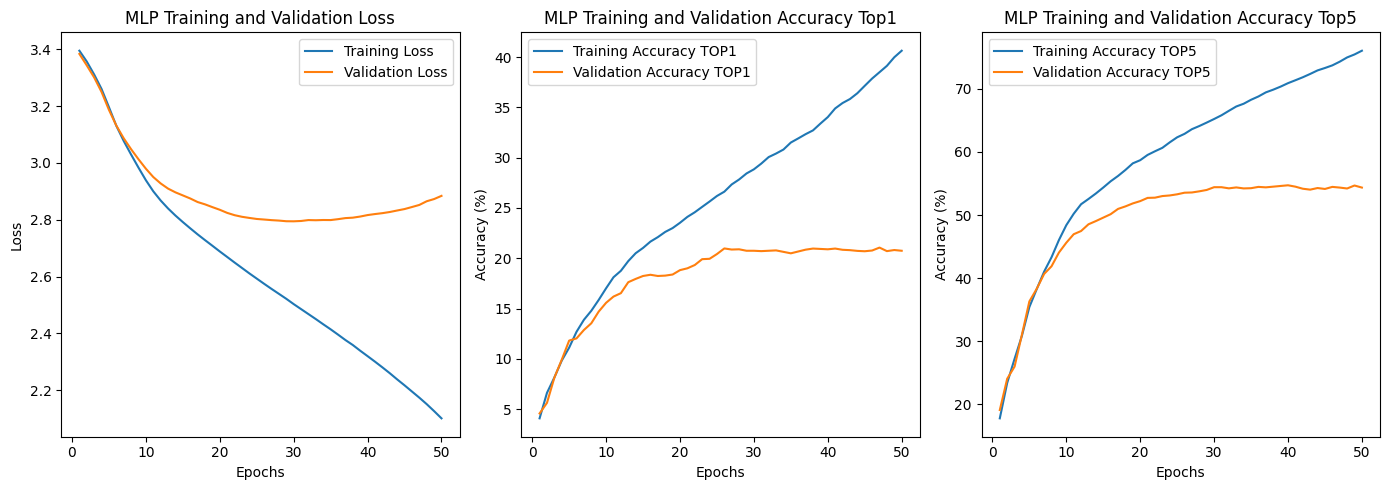

In [14]:
# Your graph
# Plotting loss curves

epochs = range(1, len(train_loss) + 1)
plt.figure(figsize=(14, 5))
plt.subplot(1, 3, 1)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('MLP Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting accuracy curves
plt.subplot(1, 3, 2)
plt.plot(epochs, train_acc_top1, label='Training Accuracy TOP1')
plt.plot(epochs, val_acc_top1, label='Validation Accuracy TOP1')
plt.title('MLP Training and Validation Accuracy Top1')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(epochs, train_acc_top5, label='Training Accuracy TOP5')
plt.plot(epochs, val_acc_top5, label='Validation Accuracy TOP5')
plt.title('MLP Training and Validation Accuracy Top5')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.tight_layout()
plt.show()

In [65]:
#TO COMPLETE --> Running your CNN model class


def CNN_validate_model(model, validation_loader, device,topk=(1,5)):
    model.eval()  # Set the model to evaluation mode
    val_loss = 0
    topk_accs_total_top1 = 0
    topk_accs_total_top5 = 0
    with torch.no_grad():
        for images, target in validation_loader:
            images, target = images.to(device), target.to(device)
            outputs = model(images)
            loss = model.criterion(outputs, target)
            val_loss += loss.item()
            accs3,accs4= topk_accuracy(outputs, target, topk=topk)
            topk_accs_total_top1 = topk_accs_total_top1 + accs3.item()
            topk_accs_total_top5 = topk_accs_total_top5 + accs4.item()

        val_loss = val_loss/len(validation_loader)
        topk_accs_avg_top1 = topk_accs_total_top1/len(validation_loader)
        topk_accs_avg_top5 = topk_accs_total_top5/len(validation_loader)
    
    return val_loss, topk_accs_avg_top1,topk_accs_avg_top5

def CNN_train_model(model, train_loader, validation_loader, device,topk=(1,5),epochs=100):
    model.to(device)
    statsrec = np.zeros((6,50))
    train_losses = []
    val_losses = []
    train_accs_top1 = []
    train_accs_top5 = []
    val_accs_top1 = []
    val_accs_top5 = []
    
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(model.optimizer, 'min', factor=0.1, patience=5)
    #scheduler =StepLR(model.optimizer,step_size= 10 , gamma=0.5)
    for epoch in range(epochs):
        model.train()  # Set model to training mode
        total_loss = 0
        topk_accs_total_train_top1 = 0 
        topk_accs_total_train_top5 = 0
        for images, target in train_loader:
            images, target = images.to(device), target.to(device)
            outputs = model(images)
            loss = model.criterion(outputs, target)
            model.optimizer.zero_grad()
            loss.backward()
            model.optimizer.step()  
            total_loss += loss.item()
            accs1,accs2= topk_accuracy(outputs, target, topk=topk)
            topk_accs_total_train_top1 = topk_accs_total_train_top1 + accs1.item()
            topk_accs_total_train_top5 = topk_accs_total_train_top5 + accs2.item()
        
        avg_train_loss = total_loss / len(train_loader)
        topk_accs_avg_train_top1 = topk_accs_total_train_top1/len(train_loader)
        topk_accs_avg_train_top5 = topk_accs_total_train_top5/len(train_loader)
        val_loss, topk_accs_avg_val_top1,topk_accs_avg_val_top5 = CNN_validate_model(model, validation_loader, device, topk=topk)
        
        scheduler.step(val_loss)
        
        train_losses.append(avg_train_loss)
        val_losses.append(val_loss)
        train_accs_top1.append(topk_accs_avg_train_top1)
        train_accs_top5.append(topk_accs_avg_train_top5)
        val_accs_top1.append(topk_accs_avg_val_top1)
        val_accs_top5.append(topk_accs_avg_val_top5)
        statsrec[:,epoch] = (avg_train_loss, topk_accs_avg_train_top1, topk_accs_avg_train_top5, val_loss,topk_accs_avg_val_top1,topk_accs_avg_val_top5)
        print(f'Epoch [{epoch+1}/{epochs}]: '
              f'Train Loss: {avg_train_loss:.4f}, '
              f'Train accuracy Top1: {topk_accs_avg_train_top1:.4f}, '
              f'Train accuracy Top5: {topk_accs_avg_train_top5:.4f}; '
              f'Validation Loss: {val_loss:.4f}, '
              f'Val accuracy Top1: {topk_accs_avg_val_top1:.4f}, '
              f'Val accuracy Top5: {topk_accs_avg_val_top5:.4f}')
    return statsrec

In [72]:
model = ConvNet(num_classes=30, learning_rate=0.001)
stats = CNN_train_model(model,train_loader,val_loader,device,epochs=50)
results_path ='./'
os.makedirs(results_path, exist_ok = True)
saveCkpt = results_path + 'cnnclassifier50epochs.pt'
torch.save({"state_dict": model.state_dict(), "stats": stats}, saveCkpt)

Epoch [1/50]: Train Loss: 3.4005, Train accuracy Top1: 3.0541, Train accuracy Top5: 16.9194; Validation Loss: 3.3991, Val accuracy Top1: 2.9797, Val accuracy Top5: 17.5145
Epoch [2/50]: Train Loss: 3.3965, Train accuracy Top1: 3.3777, Train accuracy Top5: 19.3140; Validation Loss: 3.3941, Val accuracy Top1: 3.3430, Val accuracy Top5: 19.9007
Epoch [3/50]: Train Loss: 3.3882, Train accuracy Top1: 5.4672, Train accuracy Top5: 23.6008; Validation Loss: 3.3808, Val accuracy Top1: 7.2311, Val accuracy Top5: 24.6851
Epoch [4/50]: Train Loss: 3.3484, Train accuracy Top1: 8.6631, Train accuracy Top5: 29.7522; Validation Loss: 3.2846, Val accuracy Top1: 10.0775, Val accuracy Top5: 32.5097
Epoch [5/50]: Train Loss: 3.1770, Train accuracy Top1: 11.1255, Train accuracy Top5: 36.2457; Validation Loss: 3.1267, Val accuracy Top1: 10.8769, Val accuracy Top5: 37.3062
Epoch [6/50]: Train Loss: 3.0558, Train accuracy Top1: 14.0409, Train accuracy Top5: 42.0396; Validation Loss: 3.0322, Val accuracy Top1:

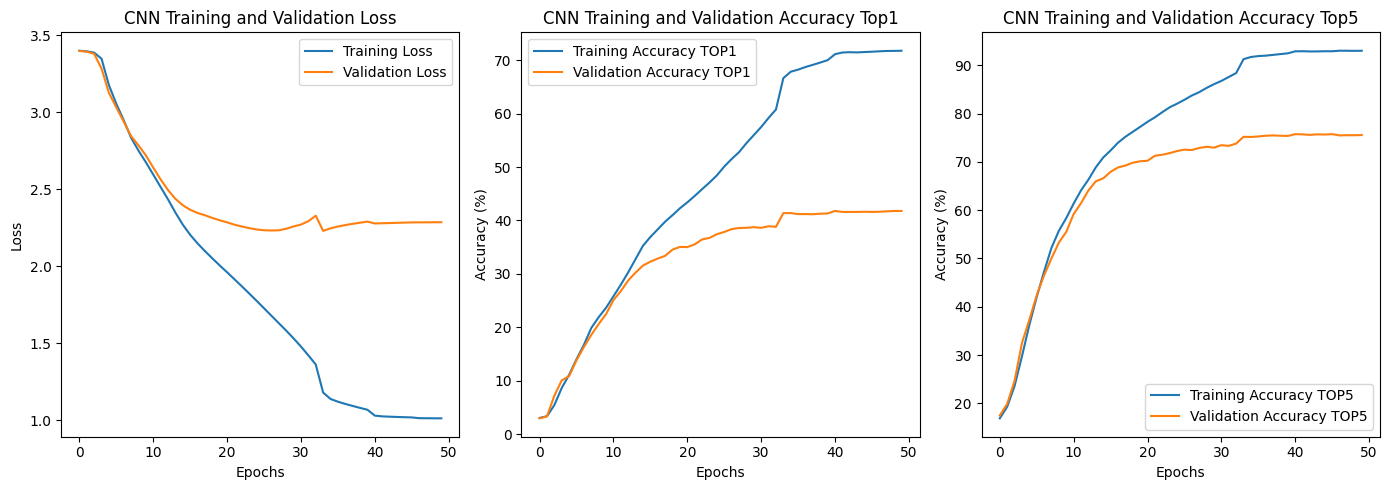

In [80]:
# Your graph
results_path ='./cnnclassifier50epochs.pt'
data = torch.load(results_path, map_location=device)
statsrec = data["stats"]
# Plotting loss curves


plt.figure(figsize=(14, 5))
plt.subplot(1, 3, 1)
plt.plot(statsrec[0], label='Training Loss')
plt.plot(statsrec[3], label='Validation Loss')
plt.title('CNN Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting accuracy curves
plt.subplot(1, 3, 2)
plt.plot(statsrec[1], label='Training Accuracy TOP1')
plt.plot(statsrec[4], label='Validation Accuracy TOP1')
plt.title('CNN Training and Validation Accuracy Top1')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(statsrec[2], label='Training Accuracy TOP5')
plt.plot(statsrec[5], label='Validation Accuracy TOP5')
plt.title('CNN Training and Validation Accuracy Top5')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.tight_layout()
plt.show()

> Comment on your model and the results you have obtained. This should include the number of parameters for each of your models and briefly explain why one should use CNN over MLP for the image classification problem.

As can be seen from the graph, all 50 epochs have already experienced overfitting and therefore do not need to continue running. For comparison, the learning rate is set to 0.001 and the SGD optimiser is used, the stochastic gradient descent momentum is set to 0.9 to keep a larger portion of the last update, which can help to continue the effective parameter updating in the future.For the MLP, I set up two hidden layers [64,32].For the CNN, I set up three convolutional layers and two fully-connected layers, the first one is set up with 32 5*5 convolutional kernels, and the maximal pooling layer is set up with a 2*2 pooling layer, which is set up with 32 5*5 convolutional kernels. layer was set with 32 convolutional kernels of size 5*5, The network size is set to 256,and the maximum pooling layer used a 2*2 window and a step size of 2, and so on below. By comparison, we can find that both of them are overfitting, but it is obvious that CNN is better, the accuracy of the training set and test set is obviously higher after 50 epochs, and we should be able to get better results by subsequent tuning.

### 2.2 Generating confusion matrix and ROC curves (6 marks)
- Use your CNN architecture with best accuracy to generate two confusion matrices, one for the training set and another for the validation set. Remember to use the whole validation and training sets, and to include all your relevant code. Display the confusion matrices in a meaningful way which clearly indicates what percentage of the data is represented in each position.
- Display an ROC curve for the two top and two bottom classes with area under the curve

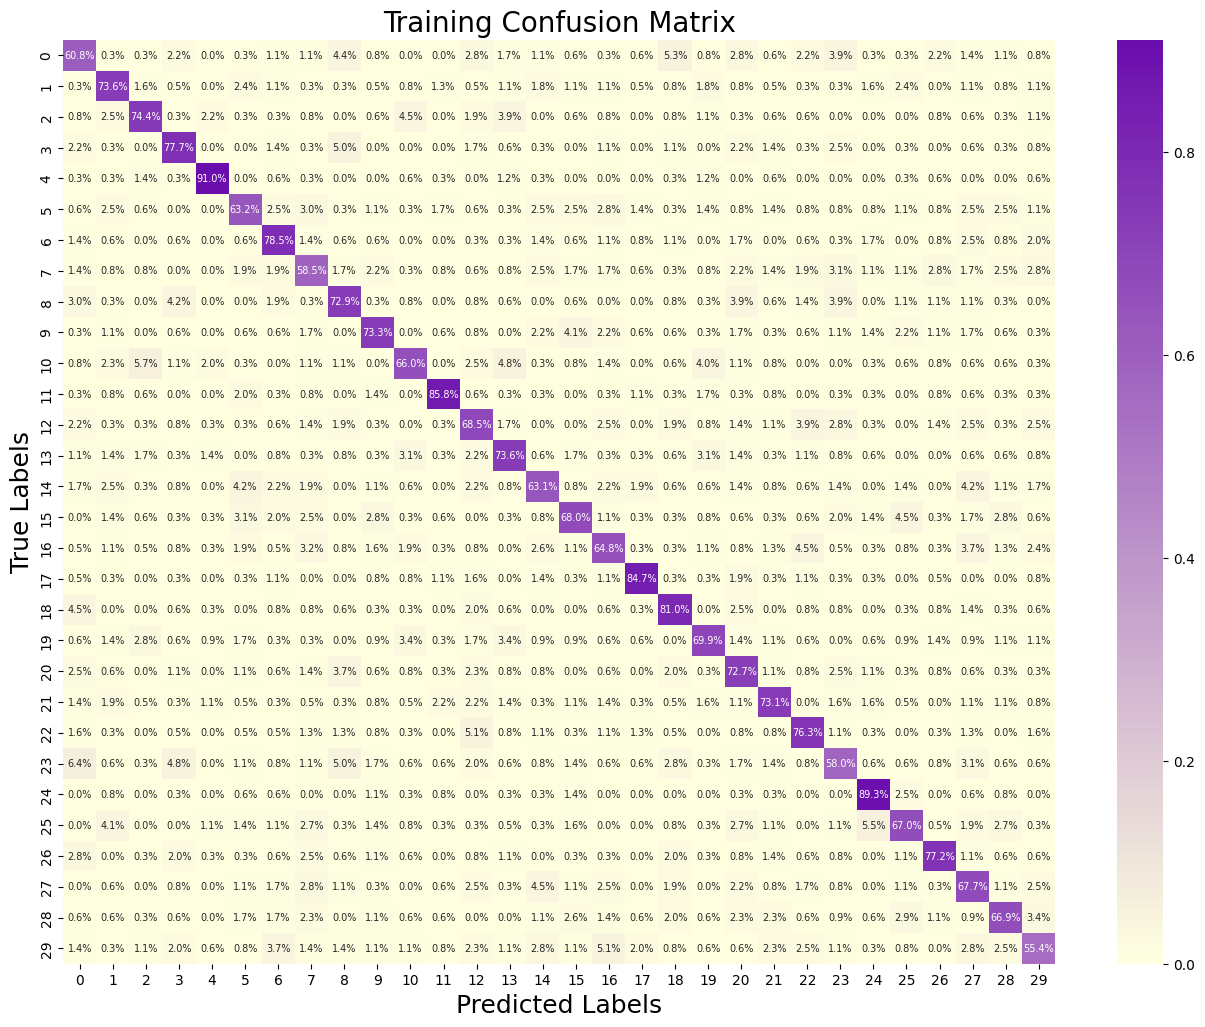

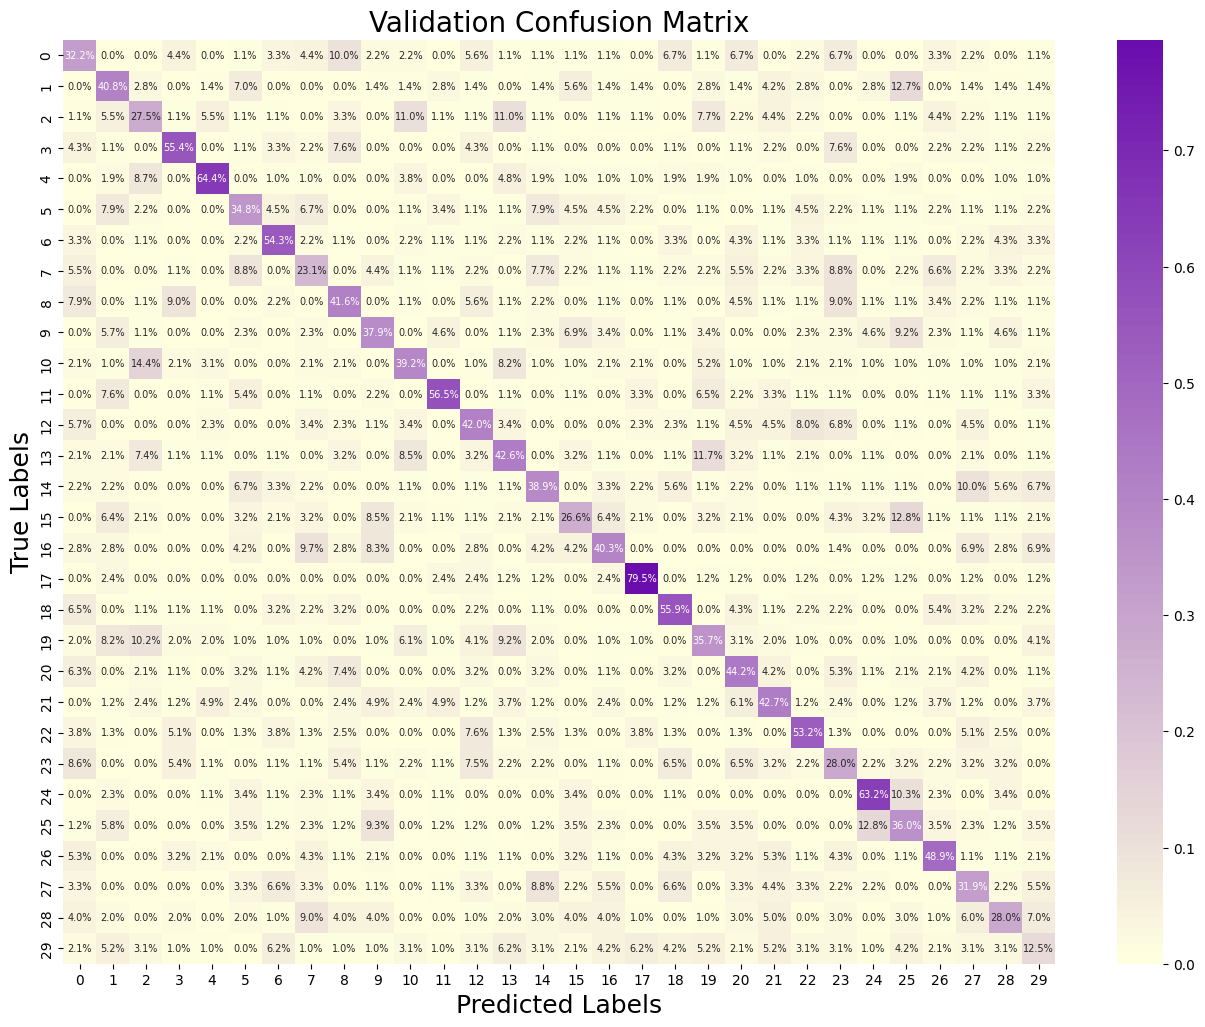

In [81]:
# Your code here!
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

results_path ='./cnnclassifier50epochs.pt'
data = torch.load(results_path, map_location=device)
model.load_state_dict(data["state_dict"])

def get_all_predictions(loader, model, device):
    all_preds = []
    all_targets = []
    model.eval()
    with torch.no_grad():
        for images, targets in loader:
            images, targets = images.to(device), targets.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_targets.extend(targets.cpu().numpy())
    return all_preds, all_targets

def plot_confusion_matrix(cm, title='Confusion Matrix', cmap=plt.cm.Blues):
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    plt.figure(figsize=(16, 12))
    sns.heatmap(cm_normalized, annot=True, fmt=".1%", cmap=cmap, annot_kws={"size": 7})
    plt.title(title, fontsize=20)
    plt.xlabel('Predicted Labels', fontsize=18)
    plt.ylabel('True Labels', fontsize=18)
    plt.show()
# Assuming train_loader and val_loader are defined
train_preds, train_targets = get_all_predictions(train_loader, model, device)
val_preds, val_targets = get_all_predictions(val_loader, model, device)

# Generate confusion matrices
train_cm = confusion_matrix(train_targets, train_preds)
val_cm = confusion_matrix(val_targets, val_preds)

# Plotting with larger figure size and font size
colors = ["lightyellow", "#6a0dad"]  # Light yellow to purple
cmap_name = "custom_yellow_purple"
n_bins = 100  # Increase for finer transitions

# Create the colormap
custom_colormap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

### Plotting with Custom Colormap

plot_confusion_matrix(train_cm, title='Training Confusion Matrix', cmap=custom_colormap)
plot_confusion_matrix(val_cm, title='Validation Confusion Matrix', cmap=custom_colormap)


In [82]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def get_class_scores_and_labels(loader, model, device, class_index):
    model.eval()
    scores = []
    labels = []
    with torch.no_grad():
        for images, targets in loader:
            images = images.to(device)
            outputs = model(images)
            probabilities = torch.softmax(outputs, dim=1)
            scores.extend(probabilities[:, class_index].cpu().numpy())
            labels.extend((targets == class_index).cpu().numpy())
    return scores, labels


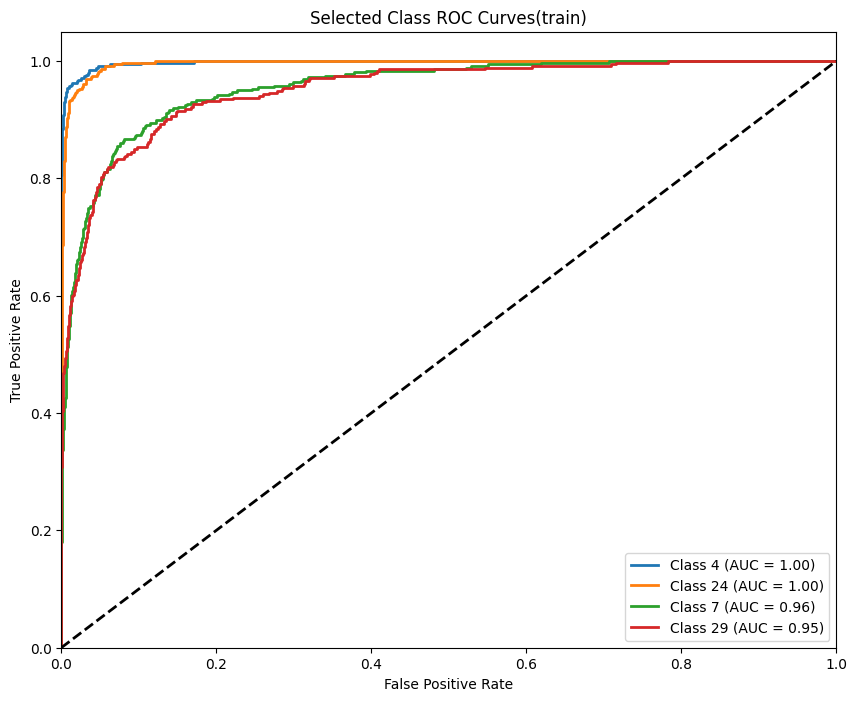

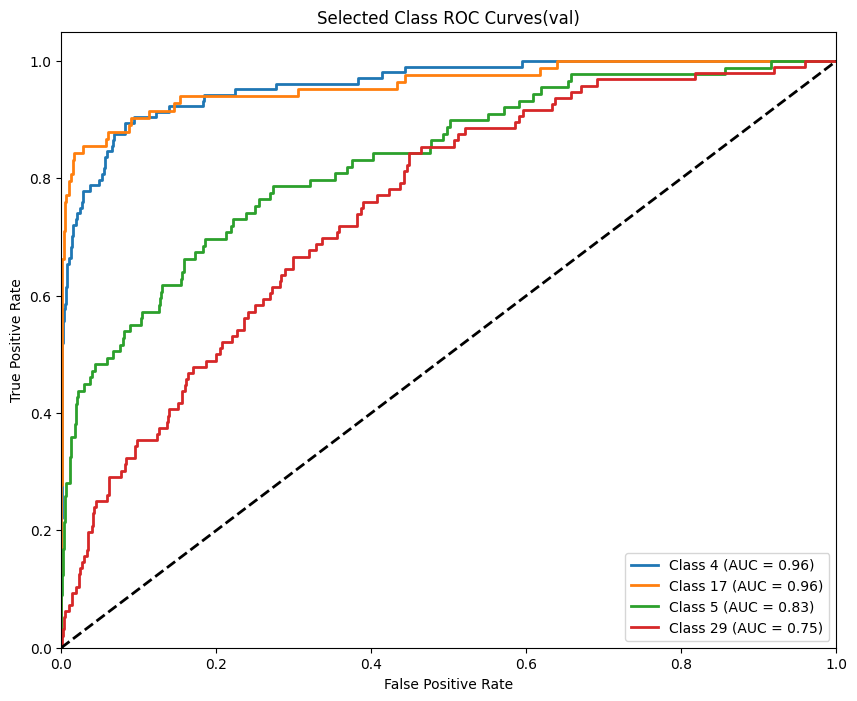

In [83]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt

def get_all_probabilities(loader, model, device):
    all_probs = []
    all_targets = []
    model.eval()
    with torch.no_grad():
        for images, targets in loader:
            images, targets = images.to(device), targets.to(device)
            outputs = model(images)
            probabilities = torch.softmax(outputs, dim=1)
            all_probs.extend(probabilities.cpu().numpy())
            all_targets.extend(targets.cpu().numpy())
    return all_probs, all_targets
results_path = './cnnclassifier50epochs.pt'
data = torch.load(results_path, map_location=device)
model.load_state_dict(data["state_dict"])

# Getting train prediction probabilities and true labels
train_probs, train_targets = get_all_probabilities(train_loader, model, device)
train_targets = np.array(train_targets)
train_probs = np.array(train_probs)
num_classes = train_probs.shape[1]

# Getting val prediction probabilities and true labels
val_probs, val_targets = get_all_probabilities(val_loader, model, device)
val_targets = np.array(val_targets)
val_probs = np.array(val_probs)
num_classes = val_probs.shape[1]

# Calculate train ROC curves and AUC values for each category
train_fpr = dict()
train_tpr = dict()
train_roc_auc = dict()
for i in range(num_classes):
    train_fpr[i], train_tpr[i], _ = roc_curve(train_targets == i, train_probs[:, i])
    train_roc_auc[i] = auc(train_fpr[i], train_tpr[i])
    
# Calculate val ROC curves and AUC values for each category
val_fpr = dict()
val_tpr = dict()
val_roc_auc = dict()
for i in range(num_classes):
    val_fpr[i], val_tpr[i], _ = roc_curve(val_targets == i, val_probs[:, i])
    val_roc_auc[i] = auc(val_fpr[i], val_tpr[i])

# val Two highest AUCs and two lowest AUCs
train_sorted_classes = sorted(range(num_classes), key=lambda i: train_roc_auc[i], reverse=True)
train_selected_classes = train_sorted_classes[:2] + train_sorted_classes[-2:]

# val Two highest AUCs and two lowest AUCs
val_sorted_classes = sorted(range(num_classes), key=lambda i: val_roc_auc[i], reverse=True)
val_selected_classes = val_sorted_classes[:2] + val_sorted_classes[-2:]

# Plotting the train ROC curve
plt.figure(figsize=(10, 8))
for i in train_selected_classes:
    plt.plot(train_fpr[i], train_tpr[i], lw=2, label='Class %d (AUC = %0.2f)' % (i, train_roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Selected Class ROC Curves(train)')
plt.legend(loc="lower right")
plt.show()

# Plotting the val ROC curve
plt.figure(figsize=(10, 8))
for i in val_selected_classes:
    plt.plot(val_fpr[i], val_tpr[i], lw=2, label='Class %d (AUC = %0.2f)' % (i, val_roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Selected Class ROC Curves(val)')
plt.legend(loc="lower right")
plt.show()

### Redesign your CNN model (optional)
> This is optional and does not carry any marks. Often to tackle model underfitting we tend to make more complex network design. Depending on your observation, you can improve your model if you wish. 

In [84]:
# Your code here (optional)
class ConvNet_modify(nn.Module):
    def __init__(self, num_classes=30, learning_rate=0.001):
        super(ConvNet_modify, self).__init__()
        # Convolutional layers
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer3 = nn.Sequential(  # Additional third convolutional layer
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer4 = nn.Sequential(  # Additional third convolutional layer
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        # Fully connected layers
        self.fc1 = nn.Linear(4 * 4 * 128, 128)  # Adjusted for the output size of the third layer
        self.fc1ReLU = nn.ReLU()
        self.fc2 = nn.Linear(128, num_classes)
        
        # Loss function and optimizer
        self.criterion = nn.CrossEntropyLoss()
        self.optimizer = optim.AdamW(self.parameters(), lr=learning_rate ,weight_decay=0.01)
        
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu") #Calling the GPU
        self.to(self.device)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)  # Pass through the third layer
        out = self.layer4(out)
        out = torch.flatten(out,1)
        out = out.view(out.size(0), -1)  # Flatten the output for the fully connected layers
        out = self.fc1(out)
        out = self.fc1ReLU(out)
        out = self.fc2(out)
        return out

**Note: All questions below here relates to the CNN model only and not an MLP model! You are advised to use your final CNN model only for each of the questions below.**

### 2.3 Strategies for tackling overfitting (18 marks)
Using your (final) CNN model perform the strategies below to avoid overfitting problems. You can resuse the network weights from previous training, often referred to as ``fine tuning``. 
*   **2.3.1** Data augmentation
*   **2.3.2** Dropout
*   **2.3.3** Hyperparameter tuning (e.g. changing learning rate)

> Plot loss and accuracy graphs per epoch side by side for each implemented strategy.

#### 2.3.1 Data augmentation (6 marks)

> Implement at least five different data augmentation techniques that should include both photometric and geometric augmentations. 

> Provide graphs and comment on what you observe.


In [30]:
# Your code here!
class AddGaussianNoise(object):
    def __init__(self, mean=0., std=1.):
        self.mean = mean
        self.std = std
        
    def __call__(self, tensor):
        return tensor + torch.randn(tensor.size()) * self.std + self.mean
      
    def __repr__(self):
        return self.__class__.__name__ + '(mean={0}, std={1})'.format(self.mean, self.std)
    
train_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    transforms.RandomHorizontalFlip(p=0.3),
    transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.03),
    transforms.RandomAffine(degrees=5, translate=(0.15, 0.15), scale=(0.8, 1.2)),
    AddGaussianNoise(0, 0.2),
])
val_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
root_dir = './comp5625M_data_assessment_1'
val_percent = 0.2
raw_dataset = PyTorchDataset(root_dir=root_dir, split='train', transform=None)

num_train_data = len(raw_dataset)
num_val_data = int(num_train_data * val_percent)
num_train_data = num_train_data - num_val_data
train_dataset_aug, val_dataset_aug = random_split(raw_dataset, [num_train_data, num_val_data])

train_dataset_aug.dataset.transform = train_transforms
val_dataset_aug.dataset.transform = val_transforms
train_loader_aug = DataLoader(train_dataset_aug,batch_size=64, shuffle=True)
val_loader_aug = DataLoader(val_dataset_aug,batch_size=64,shuffle=False)

In [91]:
def CNN_validate_model(model, validation_loader, device,topk=(1,5)):
    model.eval()  # Set the model to evaluation mode
    val_loss = 0
    topk_accs_total_top1 = 0
    topk_accs_total_top5 = 0
    with torch.no_grad():
        for images, target in validation_loader:
            images, target = images.to(device), target.to(device)
            outputs = model(images)
            loss = model.criterion(outputs, target)
            val_loss += loss.item()
            accs3,accs4= topk_accuracy(outputs, target, topk=topk)
            topk_accs_total_top1 = topk_accs_total_top1 + accs3.item()
            topk_accs_total_top5 = topk_accs_total_top5 + accs4.item()

        val_loss = val_loss/len(validation_loader)
        topk_accs_avg_top1 = topk_accs_total_top1/len(validation_loader)
        topk_accs_avg_top5 = topk_accs_total_top5/len(validation_loader)
    
    return val_loss, topk_accs_avg_top1,topk_accs_avg_top5

def CNN_train_model_modify(model, train_loader, validation_loader, device,topk=(1,5),epochs=100):
    model.to(device)
    statsrec = np.zeros((6,30))
    train_losses = []
    val_losses = []
    train_accs_top1 = []
    train_accs_top5 = []
    val_accs_top1 = []
    val_accs_top5 = []
    
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(model.optimizer, 'min', factor=0.1, patience=5)
    #scheduler =StepLR(model.optimizer,step_size= 10 , gamma=0.5)
    for epoch in range(epochs):
        model.train()  # Set model to training mode
        total_loss = 0
        topk_accs_total_train_top1 = 0 
        topk_accs_total_train_top5 = 0
        for images, target in train_loader:
            images, target = images.to(device), target.to(device)
            outputs = model(images)
            loss = model.criterion(outputs, target)
            model.optimizer.zero_grad()
            loss.backward()
            model.optimizer.step()  
            total_loss += loss.item()
            accs1,accs2= topk_accuracy(outputs, target, topk=topk)
            topk_accs_total_train_top1 = topk_accs_total_train_top1 + accs1.item()
            topk_accs_total_train_top5 = topk_accs_total_train_top5 + accs2.item()
        
        avg_train_loss = total_loss / len(train_loader)
        topk_accs_avg_train_top1 = topk_accs_total_train_top1/len(train_loader)
        topk_accs_avg_train_top5 = topk_accs_total_train_top5/len(train_loader)
        val_loss, topk_accs_avg_val_top1,topk_accs_avg_val_top5 = CNN_validate_model(model, validation_loader, device, topk=topk)
        
        scheduler.step(val_loss)
        
        train_losses.append(avg_train_loss)
        val_losses.append(val_loss)
        train_accs_top1.append(topk_accs_avg_train_top1)
        train_accs_top5.append(topk_accs_avg_train_top5)
        val_accs_top1.append(topk_accs_avg_val_top1)
        val_accs_top5.append(topk_accs_avg_val_top5)
        statsrec[:,epoch] = (avg_train_loss, topk_accs_avg_train_top1, topk_accs_avg_train_top5, val_loss,topk_accs_avg_val_top1,topk_accs_avg_val_top5)
        print(f'Epoch [{epoch+1}/{epochs}]: '
              f'Train Loss: {avg_train_loss:.4f}, '
              f'Train accuracy Top1: {topk_accs_avg_train_top1:.4f}, '
              f'Train accuracy Top5: {topk_accs_avg_train_top5:.4f}; '
              f'Validation Loss: {val_loss:.4f}, '
              f'Val accuracy Top1: {topk_accs_avg_val_top1:.4f}, '
              f'Val accuracy Top5: {topk_accs_avg_val_top5:.4f}')
    return statsrec

In [92]:
model = ConvNet_modify(num_classes=30, learning_rate=0.001)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
state_data=CNN_train_model_modify(model,train_loader_aug,val_loader_aug,device,epochs=30)
results_path ='./'
os.makedirs(results_path, exist_ok = True)
saveCkpt = results_path + 'cnnclassifier30epochs_data.pt'
torch.save({"state_dict": model.state_dict(), "stats": state_data}, saveCkpt)

Epoch [1/30]: Train Loss: 2.7167, Train accuracy Top1: 22.0260, Train accuracy Top5: 54.6259; Validation Loss: 2.4047, Val accuracy Top1: 30.5233, Val accuracy Top5: 66.3154
Epoch [2/30]: Train Loss: 2.0971, Train accuracy Top1: 38.2828, Train accuracy Top5: 74.8521; Validation Loss: 2.0632, Val accuracy Top1: 39.2078, Val accuracy Top5: 76.9622
Epoch [3/30]: Train Loss: 1.7997, Train accuracy Top1: 46.6007, Train accuracy Top5: 81.7770; Validation Loss: 2.0742, Val accuracy Top1: 41.6061, Val accuracy Top5: 75.8963
Epoch [4/30]: Train Loss: 1.5911, Train accuracy Top1: 52.7521, Train accuracy Top5: 85.4197; Validation Loss: 1.7714, Val accuracy Top1: 47.9530, Val accuracy Top5: 83.2001
Epoch [5/30]: Train Loss: 1.4142, Train accuracy Top1: 57.4119, Train accuracy Top5: 88.1441; Validation Loss: 1.6976, Val accuracy Top1: 50.3513, Val accuracy Top5: 83.0426
Epoch [6/30]: Train Loss: 1.2529, Train accuracy Top1: 61.9299, Train accuracy Top5: 90.5418; Validation Loss: 1.6607, Val accurac

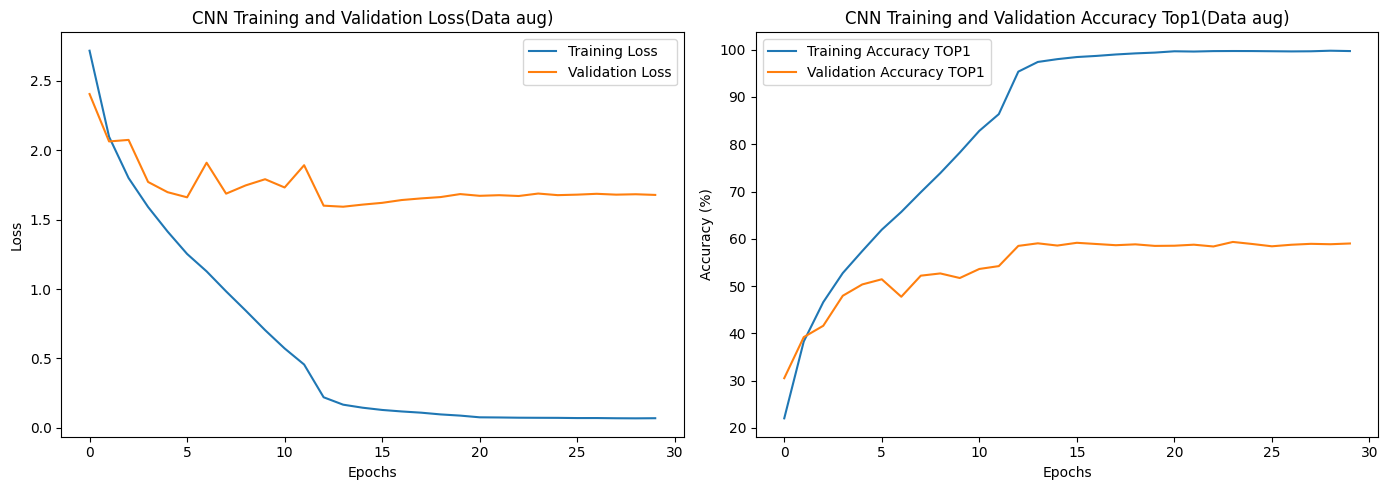

In [93]:
results_path ='./cnnclassifier30epochs_data.pt'
data = torch.load(results_path, map_location=device)
statsrec = data["stats"]
# Plotting loss curves

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(statsrec[0], label='Training Loss')
plt.plot(statsrec[3], label='Validation Loss')
plt.title('CNN Training and Validation Loss(Data aug)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting accuracy curves
plt.subplot(1, 2, 2)
plt.plot(statsrec[1], label='Training Accuracy TOP1')
plt.plot(statsrec[4], label='Validation Accuracy TOP1')
plt.title('CNN Training and Validation Accuracy Top1(Data aug)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()


plt.tight_layout()
plt.show()

It can be found that after data augmentation the model overfitting is reduced due to increased generalisation, the loss rate of the validation set is lower and the accuracy is higher.

#### 2.3.2 Dropout (6 marks)

> Implement dropout in your model 

> Provide graphs and comment on your choice of proportion used.

In [94]:
class ConvNet_Dropout(nn.Module):
    def __init__(self, num_classes=30, learning_rate=0.001):
        super(ConvNet_Dropout, self).__init__()
        # Convolutional layers
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer3 = nn.Sequential(  # Additional third convolutional layer
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer4 = nn.Sequential(  # Additional third convolutional layer
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        # Fully connected layers
        self.drop_out = nn.Dropout(0.5)
        self.fc1 = nn.Linear(4 * 4 * 128, 128)  # Adjusted for the output size of the third layer
        self.fc1ReLU = nn.ReLU()
        self.fc2 = nn.Linear(128, num_classes)
        
        # Loss function and optimizer
        self.criterion = nn.CrossEntropyLoss()
        self.optimizer = optim.AdamW(self.parameters(), lr=learning_rate ,weight_decay=0.01)
        
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu") #Calling the GPU
        self.to(self.device)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)  # Pass through the third layer
        out = self.layer4(out)
        out = torch.flatten(out,1)
        out = out.view(out.size(0), -1)  # Flatten the output for the fully connected layers
        out = self.drop_out(out)
        out = self.fc1(out)
        out = self.fc1ReLU(out)
        out = self.fc2(out)
        return out

In [95]:
model_dropout = ConvNet_Dropout(num_classes=30, learning_rate=0.001)
state_dropout=CNN_train_model_modify(model_dropout,train_loader_aug,val_loader_aug,device,epochs=30)
results_path ='./'
os.makedirs(results_path, exist_ok = True)
saveCkpt = results_path + 'cnnclassifier30epochs_dropout.pt'
torch.save({"state_dict": model_dropout.state_dict(), "stats": state_dropout}, saveCkpt)

Epoch [1/30]: Train Loss: 2.7710, Train accuracy Top1: 19.9488, Train accuracy Top5: 53.4517; Validation Loss: 2.4009, Val accuracy Top1: 30.1599, Val accuracy Top5: 68.9196
Epoch [2/30]: Train Loss: 2.1825, Train accuracy Top1: 35.1547, Train accuracy Top5: 73.8135; Validation Loss: 2.1373, Val accuracy Top1: 38.3842, Val accuracy Top5: 75.0969
Epoch [3/30]: Train Loss: 1.9236, Train accuracy Top1: 42.9610, Train accuracy Top5: 79.4286; Validation Loss: 2.0365, Val accuracy Top1: 41.4123, Val accuracy Top5: 76.2234
Epoch [4/30]: Train Loss: 1.7511, Train accuracy Top1: 48.2033, Train accuracy Top5: 82.9111; Validation Loss: 1.7675, Val accuracy Top1: 47.9046, Val accuracy Top5: 81.9041
Epoch [5/30]: Train Loss: 1.6135, Train accuracy Top1: 51.6827, Train accuracy Top5: 85.2348; Validation Loss: 1.9511, Val accuracy Top1: 45.6759, Val accuracy Top5: 79.5906
Epoch [6/30]: Train Loss: 1.5181, Train accuracy Top1: 54.6351, Train accuracy Top5: 86.4429; Validation Loss: 1.8577, Val accurac

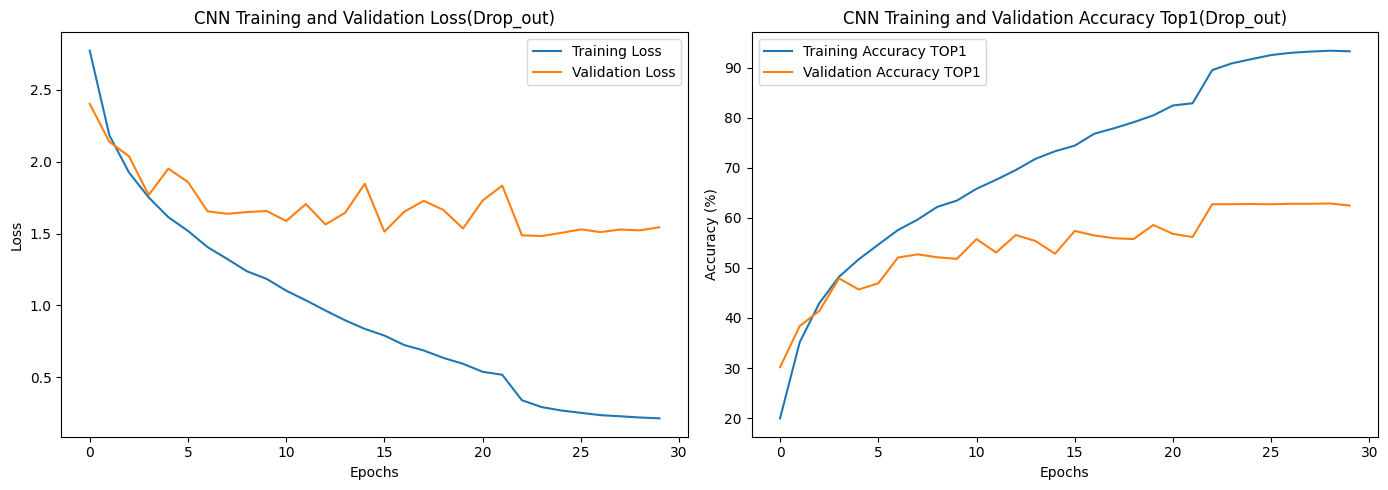

In [96]:
results_path ='./cnnclassifier30epochs_dropout.pt'
data = torch.load(results_path, map_location=device)
statsrec = data["stats"]
# Plotting loss curves

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(statsrec[0], label='Training Loss')
plt.plot(statsrec[3], label='Validation Loss')
plt.title('CNN Training and Validation Loss(Drop_out)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting accuracy curves
plt.subplot(1, 2, 2)
plt.plot(statsrec[1], label='Training Accuracy TOP1')
plt.plot(statsrec[4], label='Validation Accuracy TOP1')
plt.title('CNN Training and Validation Accuracy Top1(Drop_out)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.tight_layout()
plt.show()

After the Dropout operation, the learning rate of the model decreases due to the random masking of some neurons during the training process, which in some cases plays a positive role. It forces the learning process to not depend on any single neuron, thus enhancing generalisation. As we can see from the figure, the accuracy of the training set slightly decreases compared to the previous one, but the accuracy of the validation set increases again. It can be seen that the problem of overfitting is reduced.

#### 2.3.3 Hyperparameter tuning (6 marks)

> Use learning rates [0.1, 0.001, 0.0001].

> Provide graphs each for loss and accuracy at three different learning rates in a single graph.

In [100]:
# Your code here!
def CNN_validate_model_lr(model, validation_loader, device,topk=(1,5)):
    model.eval()  # Set the model to evaluation mode
    val_loss = 0
    topk_accs_total_top1 = 0
    topk_accs_total_top5 = 0
    with torch.no_grad():
        for images, target in validation_loader:
            images, target = images.to(device), target.to(device)
            outputs = model(images)
            loss = model.criterion(outputs, target)
            val_loss += loss.item()
            accs3,accs4= topk_accuracy(outputs, target, topk=topk)
            topk_accs_total_top1 = topk_accs_total_top1 + accs3.item()
            topk_accs_total_top5 = topk_accs_total_top5 + accs4.item()

        val_loss = val_loss/len(validation_loader)
        topk_accs_avg_top1 = topk_accs_total_top1/len(validation_loader)
        topk_accs_avg_top5 = topk_accs_total_top5/len(validation_loader)
    
    return val_loss, topk_accs_avg_top1,topk_accs_avg_top5

def CNN_train_model_lr(model, train_loader, validation_loader, device,topk=(1,5),epochs=100):
    model.to(device)
    statsrec = np.zeros((6,30))
    train_losses = []
    val_losses = []
    train_accs_top1 = []
    train_accs_top5 = []
    val_accs_top1 = []
    val_accs_top5 = []
    
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(model.optimizer, 'min', factor=0.1, patience=5)
    #scheduler =StepLR(model.optimizer,step_size= 10 , gamma=0.5)
    for epoch in range(epochs):
        model.train()  # Set model to training mode
        total_loss = 0
        topk_accs_total_train_top1 = 0 
        topk_accs_total_train_top5 = 0
        for images, target in train_loader:
            images, target = images.to(device), target.to(device)
            outputs = model(images)
            loss = model.criterion(outputs, target)
            model.optimizer.zero_grad()
            loss.backward()
            model.optimizer.step()  
            total_loss += loss.item()
            accs1,accs2= topk_accuracy(outputs, target, topk=topk)
            topk_accs_total_train_top1 = topk_accs_total_train_top1 + accs1.item()
            topk_accs_total_train_top5 = topk_accs_total_train_top5 + accs2.item()
        
        avg_train_loss = total_loss / len(train_loader)
        topk_accs_avg_train_top1 = topk_accs_total_train_top1/len(train_loader)
        topk_accs_avg_train_top5 = topk_accs_total_train_top5/len(train_loader)
        val_loss, topk_accs_avg_val_top1,topk_accs_avg_val_top5 = CNN_validate_model_lr(model, validation_loader, device, topk=topk)
        
        scheduler.step(val_loss)
        
        train_losses.append(avg_train_loss)
        val_losses.append(val_loss)
        train_accs_top1.append(topk_accs_avg_train_top1)
        train_accs_top5.append(topk_accs_avg_train_top5)
        val_accs_top1.append(topk_accs_avg_val_top1)
        val_accs_top5.append(topk_accs_avg_val_top5)
        statsrec[:,epoch] = (avg_train_loss, topk_accs_avg_train_top1, topk_accs_avg_train_top5, val_loss,topk_accs_avg_val_top1,topk_accs_avg_val_top5)
        print(f'Epoch [{epoch+1}/{epochs}]: '
              f'Train Loss: {avg_train_loss:.4f}, '
              f'Train accuracy Top1: {topk_accs_avg_train_top1:.4f}, '
              f'Train accuracy Top5: {topk_accs_avg_train_top5:.4f}; '
              f'Validation Loss: {val_loss:.4f}, '
              f'Val accuracy Top1: {topk_accs_avg_val_top1:.4f}, '
              f'Val accuracy Top5: {topk_accs_avg_val_top5:.4f}')
    return statsrec

model_01 = ConvNet_Dropout(num_classes=30, learning_rate=0.1)
state_01=CNN_train_model_lr(model_01,train_loader_aug,val_loader_aug,device,epochs=30)
results_path ='./'
os.makedirs(results_path, exist_ok = True)
saveCkpt = results_path + 'cnnclassifier30epochs_0.1.pt'
torch.save({"state_dict": model_01.state_dict(), "stats": state_01}, saveCkpt)

model_0001 = ConvNet_Dropout(num_classes=30, learning_rate=0.001)
state_0001=CNN_train_model_lr(model_0001,train_loader_aug,val_loader_aug,device,epochs=30)
results_path ='./'
os.makedirs(results_path, exist_ok = True)
saveCkpt = results_path + 'cnnclassifier30epochs_0.001.pt'
torch.save({"state_dict": model_0001.state_dict(), "stats": state_0001}, saveCkpt)

model_00001 = ConvNet_Dropout(num_classes=30, learning_rate=0.0001)
state_00001=CNN_train_model_lr(model_00001,train_loader_aug,val_loader_aug,device,epochs=30)
results_path ='./'
os.makedirs(results_path, exist_ok = True)
saveCkpt = results_path + 'cnnclassifier30epochs_0.0001.pt'
torch.save({"state_dict": model_00001.state_dict(), "stats": state_00001}, saveCkpt)


Epoch [1/30]: Train Loss: 6.3630, Train accuracy Top1: 3.4917, Train accuracy Top5: 16.6389; Validation Loss: 3.4208, Val accuracy Top1: 2.8706, Val accuracy Top5: 15.7703
Epoch [2/30]: Train Loss: 3.4138, Train accuracy Top1: 3.6397, Train accuracy Top5: 16.8485; Validation Loss: 3.4190, Val accuracy Top1: 3.1734, Val accuracy Top5: 15.9278
Epoch [3/30]: Train Loss: 3.4179, Train accuracy Top1: 2.8415, Train accuracy Top5: 15.7637; Validation Loss: 3.4145, Val accuracy Top1: 3.7912, Val accuracy Top5: 16.6424
Epoch [4/30]: Train Loss: 3.4151, Train accuracy Top1: 2.9678, Train accuracy Top5: 16.2198; Validation Loss: 3.4098, Val accuracy Top1: 3.4641, Val accuracy Top5: 17.5872
Epoch [5/30]: Train Loss: 3.4160, Train accuracy Top1: 3.1466, Train accuracy Top5: 16.5989; Validation Loss: 3.4146, Val accuracy Top1: 3.4157, Val accuracy Top5: 17.0422
Epoch [6/30]: Train Loss: 3.4171, Train accuracy Top1: 3.2976, Train accuracy Top5: 15.9794; Validation Loss: 3.4303, Val accuracy Top1: 2.8

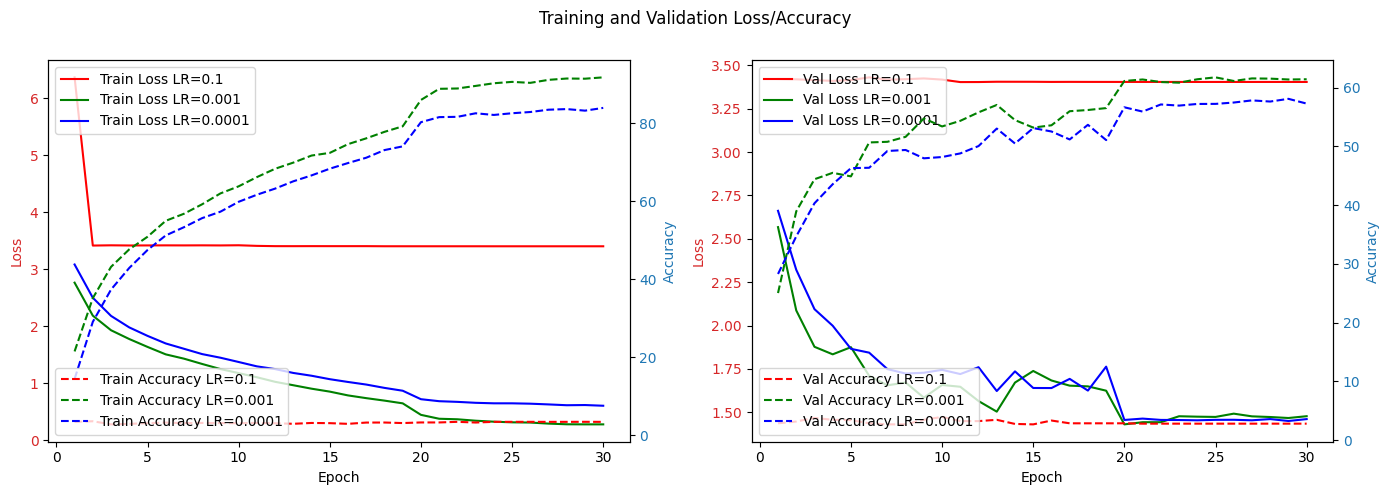

In [102]:
# Your graph
fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(14, 5))
results_path ='./cnnclassifier30epochs_0.1.pt'
data = torch.load(results_path, map_location=device)
state_01 = data["stats"]
results_path ='./cnnclassifier30epochs_0.001.pt'
data = torch.load(results_path, map_location=device)
state_0001 = data["stats"]
results_path ='./cnnclassifier30epochs_0.0001.pt'
data = torch.load(results_path, map_location=device)
state_00001 = data["stats"]
epochs = np.arange(1, 31)

color = 'tab:red'
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss', color=color)
ax1.plot(epochs, state_01[0], label='Train Loss LR=0.1', color='red' )
ax1.plot(epochs, state_0001[0], label='Train Loss LR=0.001', color='green')
ax1.plot(epochs, state_00001[0], label='Train Loss LR=0.0001', color='blue')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Accuracy', color=color)  # we already handled the x-label with ax1
ax2.plot(epochs, state_01[1], label='Train Accuracy LR=0.1', color='red', linestyle='dashed')
ax2.plot(epochs, state_0001[1], label='Train Accuracy LR=0.001', color='green', linestyle='dashed')
ax2.plot(epochs, state_00001[1], label='Train Accuracy LR=0.0001', color='blue', linestyle='dashed')
ax2.tick_params(axis='y', labelcolor=color)

color = 'tab:red'
ax3.set_xlabel('Epoch')
ax3.set_ylabel('Loss', color=color)
ax3.plot(epochs, state_01[3], label='Val Loss LR=0.1', color='red')
ax3.plot(epochs, state_0001[3], label='Val Loss LR=0.001', color='green')
ax3.plot(epochs, state_00001[3], label='Val Loss LR=0.0001', color='blue')
ax3.tick_params(axis='y', labelcolor=color)

ax4 = ax3.twinx()
ax4.set_ylabel('Accuracy', color='tab:blue')
ax4.plot(epochs, state_01[4], label='Val Accuracy LR=0.1', color='red', linestyle='dashed')
ax4.plot(epochs, state_0001[4], label='Val Accuracy LR=0.001', color='green', linestyle='dashed')
ax4.plot(epochs, state_00001[4], label='Val Accuracy LR=0.0001', color='blue', linestyle='dashed')
ax4.tick_params(axis='y', labelcolor='tab:blue')

fig.tight_layout()
plt.suptitle('Training and Validation Loss/Accuracy')
fig.subplots_adjust(top=0.88) 
ax1.legend(loc="upper left")
ax2.legend(loc="lower left")
ax3.legend(loc="upper left")
ax4.legend(loc="lower left")
plt.show()


### 3 Model testing [10 marks]
Online evaluation of your model performance on the test set. 

> Prepare the dataloader for the testset.

> Write evaluation code for writing predictions.

> Upload it to Kaggle submission page (6 marks)


#### 3.1 Test class and predictions (4 marks)

> Build a test class, prepare a test dataloader and generate predictions

Create a PyTorch ```Dataset``` for the unlabeled test data in the test_set folder of the Kaggle competition and generate predictions using your final model. Test data can be downloaded [here](https://www.kaggle.com/competitions/comp5623m-artificial-intelligence/data?select=test_set).

In [103]:
# Your code here!
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import os

class PyTorchDataset(Dataset):
    def __init__(self, root_dir, split='train', transform=None, is_test=False):
        
        self.transform = transform
        self.is_test = is_test
        if is_test:
            self.root_dir = os.path.join(root_dir,  f'{split}_set', f'{split}_set')
            self.imgs = [(os.path.join(self.root_dir, img_name), -1) for img_name in os.listdir(self.root_dir) if img_name.lower().endswith(('.png', '.jpg', '.jpeg'))]
        else:
            self.root_dir = os.path.join(root_dir, f'{split}_set', f'{split}_set')
            self.classes = [d for d in os.listdir(self.root_dir) if os.path.isdir(os.path.join(self.root_dir, d))]
            self.classes.sort()
            self.class_to_idx = {cls_name: i for i, cls_name in enumerate(self.classes)}
            self.imgs = []
            for class_name in self.classes:
                class_dir = os.path.join(self.root_dir, class_name)
                for img_name in [img for img in os.listdir(class_dir) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]:
                    self.imgs.append((os.path.join(class_dir, img_name), self.class_to_idx[class_name]))

    def __len__(self):
        return len(self.imgs)

    def __getitem__(self, idx):
        img_path, class_idx = self.imgs[idx]
        image = Image.open(img_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image, class_idx

test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

test_dataset = PyTorchDataset(root_dir=root_dir, split='test', transform=test_transforms, is_test=True)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

#### 3.2 Prepare your submission and upload to Kaggle  (6 marks)

Save all test predictions to a CSV file and submit it to the private class Kaggle competition. **Please save your test CSV file submissions using your student username (the one with letters, e.g., ``sc15jb``, not the ID with only numbers)**, for example, `sc15jb.csv`. That will help us to identify your submissions.

The CSV file must contain only two columns: ‘Id’ and ‘Category’ (predicted class ID) as shown below:

```txt
Id,Category
28d0f5e9_373c.JPEG,2
bbe4895f_40bf.JPEG,18
```

The ‘Id’ column should include the name of the image. It is important to keep the same name as the one on the test set. Do not include any path, just the name of file (with extension). Your csv file must contain 1501 rows, one for each image on test set and 1 row for the headers. [To submit please click here.](https://www.kaggle.com/t/917fe52f6a3c4855880a24b34f26db07)

> You may submit multiple times. We will use your personal top entry for allocating marks for this [6 marks]. 


In [104]:
# Your code here! 
import csv

results = []

with torch.no_grad():
    for i,(images, _ )in enumerate(test_loader):
        images = images.to(device) 

        outputs = model_dropout(images)
        _, predicted = torch.max(outputs, 1)

        pred = predicted[0]
        img_path = test_loader.dataset.imgs[i][0]
        img_id = os.path.basename(img_path)  
        results.append([img_id, pred.item()]) 

with open('sc20l2h.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Id', 'Category']) 
    writer.writerows(results)


### 4 Model Fine-tuning/transfer learning on CIFAR10 dataset  [16 marks]

Fine-tuning is a way of applying or utilizing transfer learning. It is a process that takes a model that has already been trained for one given task and then tunes or tweaks the model to make it perform a second similar task. You can perform fine-tuning in following fashion:

- Train an entire model: Start training model from scratch (large dataset, more computation)

- Train some layers, freeze others: Lower layer features are general (problem independent) while higher layer features are specific (problem dependent – freeze)

- Freeze convolution base and train only last FC layers (small dataset and lower computation) 

> **Configuring your dataset**
   - Download your dataset using ``torchvision.datasets.CIFAR10`` [explained here](https://pytorch.org/vision/stable/generated/torchvision.datasets.CIFAR10.html)
   - Split training dataset into training and validation set similar to above. *Note that the number of categories here is only 10*


In [11]:
# Your code here! 
import torch
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

train_dataset_CIFAR10_Tol = torchvision.datasets.CIFAR10(root='./',train=True, download=True)

class AddGaussianNoise(object):
    def __init__(self, mean=0., std=1.):
        self.mean = mean
        self.std = std
        
    def __call__(self, tensor):
        return tensor + torch.randn(tensor.size()) * self.std + self.mean
      
    def __repr__(self):
        return self.__class__.__name__ + '(mean={0}, std={1})'.format(self.mean, self.std)
    
train_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.RandomCrop(64, padding=1),
    transforms.RandomHorizontalFlip(p=0.3),
    transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.03),
    transforms.RandomAffine(degrees=5, translate=(0.15, 0.15), scale=(0.8, 1.2)),
    AddGaussianNoise(0, 0.2),
    transforms.Resize((64, 64)),
    transforms.Lambda(lambda x: x.repeat(3,1,1) if x.size(0) == 1 else x),
    transforms.Lambda(lambda x: x.float()),
    transforms.Lambda(lambda x: x / 255.0 if x.max() > 1.0 else x),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
     # Mean and standard deviation by calculation
])
val_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((64, 64)),
    transforms.Lambda(lambda x: x.repeat(3,1,1) if x.size(0) == 1 else x),
    transforms.Lambda(lambda x: x.float()),
    transforms.Lambda(lambda x: x / 255.0 if x.max() > 1.0 else x),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

val_percent = 0.2
num_train_data = len(train_dataset_CIFAR10_Tol)
num_val_data = int(num_train_data * val_percent)
num_train_data -= num_val_data

train_dataset_CIFAR10, val_dataset_CIFAR10 = random_split(train_dataset_CIFAR10_Tol, [num_train_data, num_val_data])

train_dataset_CIFAR10.dataset.transform = train_transforms
val_dataset_CIFAR10.dataset.transform = val_transforms

train_loader_ale = DataLoader(train_dataset_CIFAR10,batch_size=64, shuffle=True)
val_loader_ale = DataLoader(val_dataset_CIFAR10,batch_size=64,shuffle=False)


Files already downloaded and verified


> Load pretrained AlexNet from PyTorch - use model copies to apply transfer learning in different configurations

In [12]:
# Your code here!
import torch
import copy
import torch.nn as nn
from torchvision import models, datasets, transforms
from torch.utils.data import DataLoader

alexnet = models.alexnet(pretrained=True)
alexnet_forbase = copy.deepcopy(alexnet)


#### 4.1 Apply transfer learning with pretrained model weights (6 marks)


> Configuration 1: No frozen layers

In [13]:
# Your model changes here - also print trainable parameters
import torch.optim as optim
num_classes = 10 
alexnet.classifier[6] = nn.Linear(alexnet.classifier[6].in_features, num_classes)
for name, param in alexnet.named_parameters():
    if param.requires_grad:
        print(name, param.size())
optimizer = optim.Adam(alexnet.parameters(), lr=0.001)
criterion = torch.nn.CrossEntropyLoss()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def Alexnet_validate_model(model, validation_loader, criterion,device,topk=(1,5)):
    model.eval()  # Set the model to evaluation mode
    val_loss = 0
    topk_accs_total_top1 = 0
    topk_accs_total_top5 = 0
    with torch.no_grad():
        for images, target in validation_loader:
            images, target = images.to(device), target.to(device)
            outputs = model(images)
            loss = criterion(outputs, target)
            val_loss += loss.item()
            accs3,accs4= topk_accuracy(outputs, target, topk=topk)
            topk_accs_total_top1 = topk_accs_total_top1 + accs3.item()
            topk_accs_total_top5 = topk_accs_total_top5 + accs4.item()

        val_loss = val_loss/len(validation_loader)
        topk_accs_avg_top1 = topk_accs_total_top1/len(validation_loader)
        topk_accs_avg_top5 = topk_accs_total_top5/len(validation_loader)
    
    return val_loss, topk_accs_avg_top1,topk_accs_avg_top5

def Alexnet_train_model_modify(model, train_loader, validation_loader,criterion,optimizer, device,topk=(1,5),epochs=100):
    model.to(device)
    statsrec = np.zeros((6,30))
    train_losses = []
    val_losses = []
    train_accs_top1 = []
    train_accs_top5 = []
    val_accs_top1 = []
    val_accs_top5 = []
    
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', factor=0.1, patience=5)
    #scheduler =StepLR(model.optimizer,step_size= 10 , gamma=0.5)
    for epoch in range(epochs):
        model.train()  # Set model to training mode
        total_loss = 0
        topk_accs_total_train_top1 = 0 
        topk_accs_total_train_top5 = 0
        for images, target in train_loader:
            images, target = images.to(device), target.to(device)
            outputs = model(images)
            loss = criterion(outputs, target)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()  
            total_loss += loss.item()
            accs1,accs2= topk_accuracy(outputs, target, topk=topk)
            topk_accs_total_train_top1 = topk_accs_total_train_top1 + accs1.item()
            topk_accs_total_train_top5 = topk_accs_total_train_top5 + accs2.item()
        
        avg_train_loss = total_loss / len(train_loader)
        topk_accs_avg_train_top1 = topk_accs_total_train_top1/len(train_loader)
        topk_accs_avg_train_top5 = topk_accs_total_train_top5/len(train_loader)
        val_loss, topk_accs_avg_val_top1,topk_accs_avg_val_top5 = Alexnet_validate_model(model, validation_loader,criterion, device, topk=topk)
        
        scheduler.step(val_loss)
        
        train_losses.append(avg_train_loss)
        val_losses.append(val_loss)
        train_accs_top1.append(topk_accs_avg_train_top1)
        train_accs_top5.append(topk_accs_avg_train_top5)
        val_accs_top1.append(topk_accs_avg_val_top1)
        val_accs_top5.append(topk_accs_avg_val_top5)
        statsrec[:,epoch] = (avg_train_loss, topk_accs_avg_train_top1, topk_accs_avg_train_top5, val_loss,topk_accs_avg_val_top1,topk_accs_avg_val_top5)
        print(f'Epoch [{epoch+1}/{epochs}]: '
              f'Train Loss: {avg_train_loss:.4f}, '
              f'Train accuracy Top1: {topk_accs_avg_train_top1:.4f}, '
              f'Train accuracy Top5: {topk_accs_avg_train_top5:.4f}; '
              f'Validation Loss: {val_loss:.4f}, '
              f'Val accuracy Top1: {topk_accs_avg_val_top1:.4f}, '
              f'Val accuracy Top5: {topk_accs_avg_val_top5:.4f}')
    return statsrec

alexnet_train=Alexnet_train_model_modify(alexnet,train_loader_ale,val_loader_ale,criterion,optimizer,device,epochs=30)

features.0.weight torch.Size([64, 3, 11, 11])
features.0.bias torch.Size([64])
features.3.weight torch.Size([192, 64, 5, 5])
features.3.bias torch.Size([192])
features.6.weight torch.Size([384, 192, 3, 3])
features.6.bias torch.Size([384])
features.8.weight torch.Size([256, 384, 3, 3])
features.8.bias torch.Size([256])
features.10.weight torch.Size([256, 256, 3, 3])
features.10.bias torch.Size([256])
classifier.1.weight torch.Size([4096, 9216])
classifier.1.bias torch.Size([4096])
classifier.4.weight torch.Size([4096, 4096])
classifier.4.bias torch.Size([4096])
classifier.6.weight torch.Size([10, 4096])
classifier.6.bias torch.Size([10])
Epoch [1/30]: Train Loss: 1.7854, Train accuracy Top1: 31.4575, Train accuracy Top5: 83.9550; Validation Loss: 1.3392, Val accuracy Top1: 48.8555, Val accuracy Top5: 94.1879
Epoch [2/30]: Train Loss: 1.2343, Train accuracy Top1: 56.5125, Train accuracy Top5: 94.3625; Validation Loss: 1.0616, Val accuracy Top1: 62.7189, Val accuracy Top5: 96.1286
Epoch 

In [14]:
import os
results_path ='./'
os.makedirs(results_path, exist_ok = True)
saveCkpt = results_path + 'Alexnetclassifier30epochs_notforzen.pt'
torch.save({"state_dict": alexnet.state_dict(), "stats": alexnet_train}, saveCkpt)

#### 4.2 Fine-tuning model with frozen layers (6 marks)

> Configuration 2: Frozen base convolution blocks

In [15]:
# Your changes here - also print trainable parameters
import torch.optim as optim
num_classes = 10 
alexnet_forbase.classifier[6] = nn.Linear(alexnet_forbase.classifier[6].in_features, num_classes)
for param in alexnet_forbase.features.parameters():
    param.requires_grad = False
for name, param in alexnet_forbase.named_parameters():
    if param.requires_grad:
        print(name, param.size())
optimizer = optim.Adam(alexnet_forbase.parameters(), lr=0.001)
criterion = torch.nn.CrossEntropyLoss()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def CNN_validate_model(model, validation_loader, criterion,device,topk=(1,5)):
    model.eval()  # Set the model to evaluation mode
    val_loss = 0
    topk_accs_total_top1 = 0
    topk_accs_total_top5 = 0
    with torch.no_grad():
        for images, target in validation_loader:
            images, target = images.to(device), target.to(device)
            outputs = model(images)
            loss = criterion(outputs, target)
            val_loss += loss.item()
            accs3,accs4= topk_accuracy(outputs, target, topk=topk)
            topk_accs_total_top1 = topk_accs_total_top1 + accs3.item()
            topk_accs_total_top5 = topk_accs_total_top5 + accs4.item()

        val_loss = val_loss/len(validation_loader)
        topk_accs_avg_top1 = topk_accs_total_top1/len(validation_loader)
        topk_accs_avg_top5 = topk_accs_total_top5/len(validation_loader)
    
    return val_loss, topk_accs_avg_top1,topk_accs_avg_top5

def CNN_train_model_modify(model, train_loader, validation_loader,criterion,optimizer, device,topk=(1,5),epochs=100):
    model.to(device)
    statsrec = np.zeros((6,30))
    train_losses = []
    val_losses = []
    train_accs_top1 = []
    train_accs_top5 = []
    val_accs_top1 = []
    val_accs_top5 = []
    
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', factor=0.1, patience=5)
    #scheduler =StepLR(model.optimizer,step_size= 10 , gamma=0.5)
    for epoch in range(epochs):
        model.train()  # Set model to training mode
        total_loss = 0
        topk_accs_total_train_top1 = 0 
        topk_accs_total_train_top5 = 0
        for images, target in train_loader:
            images, target = images.to(device), target.to(device)
            outputs = model(images)
            loss = criterion(outputs, target)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()  
            total_loss += loss.item()
            accs1,accs2= topk_accuracy(outputs, target, topk=topk)
            topk_accs_total_train_top1 = topk_accs_total_train_top1 + accs1.item()
            topk_accs_total_train_top5 = topk_accs_total_train_top5 + accs2.item()
        
        avg_train_loss = total_loss / len(train_loader)
        topk_accs_avg_train_top1 = topk_accs_total_train_top1/len(train_loader)
        topk_accs_avg_train_top5 = topk_accs_total_train_top5/len(train_loader)
        val_loss, topk_accs_avg_val_top1,topk_accs_avg_val_top5 = CNN_validate_model(model, validation_loader,criterion, device, topk=topk)
        
        scheduler.step(val_loss)
        
        train_losses.append(avg_train_loss)
        val_losses.append(val_loss)
        train_accs_top1.append(topk_accs_avg_train_top1)
        train_accs_top5.append(topk_accs_avg_train_top5)
        val_accs_top1.append(topk_accs_avg_val_top1)
        val_accs_top5.append(topk_accs_avg_val_top5)
        statsrec[:,epoch] = (avg_train_loss, topk_accs_avg_train_top1, topk_accs_avg_train_top5, val_loss,topk_accs_avg_val_top1,topk_accs_avg_val_top5)
        print(f'Epoch [{epoch+1}/{epochs}]: '
              f'Train Loss: {avg_train_loss:.4f}, '
              f'Train accuracy Top1: {topk_accs_avg_train_top1:.4f}, '
              f'Train accuracy Top5: {topk_accs_avg_train_top5:.4f}; '
              f'Validation Loss: {val_loss:.4f}, '
              f'Val accuracy Top1: {topk_accs_avg_val_top1:.4f}, '
              f'Val accuracy Top5: {topk_accs_avg_val_top5:.4f}')
    return statsrec

alexnet_train_forbase=Alexnet_train_model_modify(alexnet_forbase,train_loader_ale,val_loader_ale,criterion,optimizer,device,epochs=30)
results_path ='./'
os.makedirs(results_path, exist_ok = True)
saveCkpt = results_path + 'Alexnetclassifier30epochs_frozenbase.pt'
torch.save({"state_dict": alexnet_forbase.state_dict(), "stats": alexnet_train_forbase}, saveCkpt)


classifier.1.weight torch.Size([4096, 9216])
classifier.1.bias torch.Size([4096])
classifier.4.weight torch.Size([4096, 4096])
classifier.4.bias torch.Size([4096])
classifier.6.weight torch.Size([10, 4096])
classifier.6.bias torch.Size([10])
Epoch [1/30]: Train Loss: 1.3286, Train accuracy Top1: 54.0275, Train accuracy Top5: 94.1250; Validation Loss: 1.1206, Val accuracy Top1: 61.2759, Val accuracy Top5: 95.5613
Epoch [2/30]: Train Loss: 1.1623, Train accuracy Top1: 59.6825, Train accuracy Top5: 95.6500; Validation Loss: 1.0515, Val accuracy Top1: 63.0772, Val accuracy Top5: 96.2381
Epoch [3/30]: Train Loss: 1.1119, Train accuracy Top1: 61.4825, Train accuracy Top5: 95.9175; Validation Loss: 1.0799, Val accuracy Top1: 60.7584, Val accuracy Top5: 96.3475
Epoch [4/30]: Train Loss: 1.0767, Train accuracy Top1: 62.9750, Train accuracy Top5: 96.2050; Validation Loss: 1.0066, Val accuracy Top1: 64.9283, Val accuracy Top5: 96.7755
Epoch [5/30]: Train Loss: 1.0503, Train accuracy Top1: 63.8575

#### 4.3 Compare above configurations and comment on performances. (4 marks)

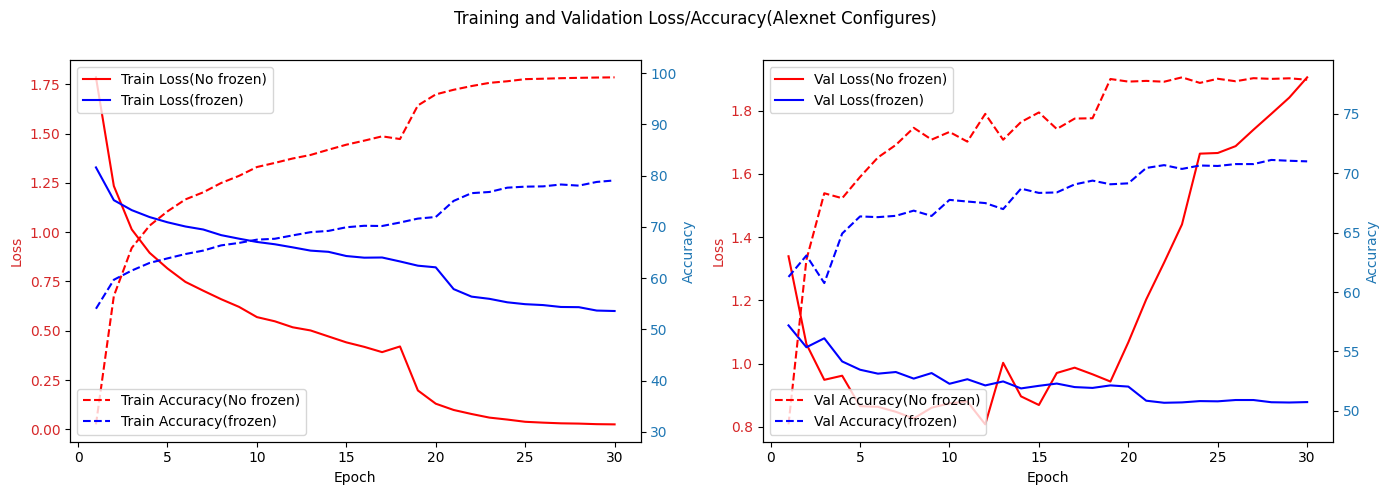

In [16]:
# Your graphs here and please provide comment in markdown in another cell
import matplotlib.pyplot as plt
import numpy as np

fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(14, 5))
results_path ='./Alexnetclassifier30epochs_notforzen.pt'
data = torch.load(results_path, map_location=device)
state_1 = data["stats"]
results_path ='./Alexnetclassifier30epochs_frozenbase.pt'
data = torch.load(results_path, map_location=device)
state_2 = data["stats"]
epochs = np.arange(1, 31)

color = 'tab:red'
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss', color=color)
ax1.plot(epochs, state_1[0], label='Train Loss(No frozen)', color='red' )
ax1.plot(epochs, state_2[0], label='Train Loss(frozen)', color='blue')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Accuracy', color=color)  # we already handled the x-label with ax1
ax2.plot(epochs, state_1[1], label='Train Accuracy(No frozen)', color='red', linestyle='dashed')
ax2.plot(epochs, state_2[1], label='Train Accuracy(frozen)', color='blue', linestyle='dashed')
ax2.tick_params(axis='y', labelcolor=color)

color = 'tab:red'
ax3.set_xlabel('Epoch')
ax3.set_ylabel('Loss', color=color)
ax3.plot(epochs, state_1[3], label='Val Loss(No frozen)', color='red')
ax3.plot(epochs, state_2[3], label='Val Loss(frozen)', color='blue')
ax3.tick_params(axis='y', labelcolor=color)

ax4 = ax3.twinx()
ax4.set_ylabel('Accuracy', color='tab:blue')
ax4.plot(epochs, state_1[4], label='Val Accuracy(No frozen)', color='red', linestyle='dashed')
ax4.plot(epochs, state_2[4], label='Val Accuracy(frozen)', color='blue', linestyle='dashed')
ax4.tick_params(axis='y', labelcolor='tab:blue')

fig.tight_layout()
plt.suptitle('Training and Validation Loss/Accuracy(Alexnet Configures)')
fig.subplots_adjust(top=0.88) 
ax1.legend(loc="upper left")
ax2.legend(loc="lower left")
ax3.legend(loc="upper left")
ax4.legend(loc="lower left")
plt.show()

From the figure we can see that the accuracy of configuration 1 is higher for both the training and test sets. But Configuration 1 from Figure 2 we can clearly see that it shows overfitting, even though the accuracy of its validation set is increasing, the loss rate is also increasing, which is an indication of overfitting and possible overlearning. And configuration 2 we can find that its accuracy are relatively low, but the loss rate of the validation set is not improving but levelling off after decreasing, it is clear that this configuration improves the generalisation ability by sacrificing some training performance to resist overfitting.

### Part II: Image Captioning using RNN [30 marks]



### Motivation 

Through this part of assessment you will:

> 1. Understand the principles of text pre-processing and vocabulary building (provided).
> 2. Gain experience working with an image to text model.
> 3. Use and compare text similarity metrics for evaluating an image to text model, and understand evaluation challenges.

#### Dataset
This assessment will use a subset of the [COCO "Common Objects in Context" dataset](https://cocodataset.org/) for image caption generation. COCO contains 330K images, of 80 object categories, and at least five textual reference captions per image. Our subset consists of nearly 5070 of these images, each of which has five or more different descriptions of the salient entities and activities, and we will refer to it as COCO_5070.

To download the data:

> 1. **Images and annotations**: download the zipped file provided in the link here as [``COMP5625M_data_assessment_2.zip``](https://leeds365-my.sharepoint.com/:u:/g/personal/scssali_leeds_ac_uk/EWWzE-_AIrlOkvOKxH4rjIgBF_eUx8KDJMPKM2eHwCE0dg?e=DdX62H). 

``Info only:`` To understand more about the COCO dataset you can look at the [download page](https://cocodataset.org/#download). We have already provided you with the "2017 Train/Val annotations (241MB)" but our image subset consists of fewer images compared to orginial COCO dataset. So, no need to download anything from here! 

> 2. **Image meta data**: as our set is a subset of full COCO dataset, we have created a CSV file containing relevant meta data for our particular subset of images. You can download it also from Drive, "coco_subset_meta.csv" at the same link as 1.

#### Submission

You can either submit the same file or make a two separate .ipython notebook files zipped in the submission (please name as ``yourstudentusername_partI.ipynb`` and ``yourstudentusername_partII.ipynb``). 

**Final note:**

> **Please include in this notebook everything that you would like to be marked, including figures. Under each section, put the relevant code containing your solution. You may re-use functions you defined previously, but any new code must be in the relevant section.** Feel free to add as many code cells as you need under each section.


The basic principle of our image-to-text model is as pictured in the diagram below, where an Encoder network encodes the input image as a feature vector by providing the outputs of the last fully-connected layer of a pre-trained CNN (we use [ResNet50](https://arxiv.org/abs/1512.03385)). This pretrained network has been trained on the complete ImageNet dataset and is thus able to recognise common objects. 

You can alternatively use the COCO trained pretrained weights from [PyTorch](https://pytorch.org/vision/stable/models.html). One way to do this is use the "FasterRCNN_ResNet50_FPN_V2_Weights.COCO_V1" but use e.g., "resnet_model = model.backbone.body". Alternatively, you can use the checkpoint from your previous coursework where you fine-tuned to COCO dataset. 

These features are then fed into a Decoder network along with the reference captions. As the image feature dimensions are large and sparse, the Decoder network includes a linear layer which downsizes them, followed by *a batch normalisation layer to speed up training*. Those resulting features, as well as the reference text captions, are then passed into a recurrent network (we will use an **RNNs** in this assessment). 

The reference captions used to compute loss are represented as numerical vectors via an **embedding layer** whose weights are learned during training.

<!-- ![Encoder Decoder](comp5625M_figure.jpg) -->

<div>
<center><img src="comp5625M_figure.jpg" width="1000"/></center>
</div>


### Instructions for creating vocabulary 

A helper function file ``helperDL.py`` is provided that includes all the functions that will do the following for you. You can easily import these functions in the exercise, most are already done for you!  

> 1. Extracting image features (a trained checkpoint is provided ``resnet50_caption.pt`` for you to download and use it for training your RNN)
> 2. Text preparation of training and validation data is provided

In [4]:
import torch
import torch.nn as nn
from torchvision import transforms
import torchvision.models as models
from torch.utils.data import Dataset
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
import matplotlib.pyplot as plt
from collections import Counter
import os
import numpy as np

In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Using device: cuda


**Please refer to the submission section at the top of this notebook to prepare your submission.**


In [6]:
# Load the feature map provided to you
features_map = torch.load('resnet50_caption.pt', map_location=device) 

#### 5 Train DecoderRNN [20 marks]

> 5.1 Design a RNN-based decoder (10 marks)

> 5.2 Train your model with precomputed features (10 Marks)

##### 5.1 Design a RNN-based decoder (10 marks)

Read through the ```DecoderRNN``` model below. First, complete the decoder by adding an ```rnn``` layer to the decoder where indicated, using [the PyTorch API as reference](https://pytorch.org/docs/stable/nn.html#rnn).

Keep all the default parameters except for ```batch_first```, which you may set to True.

In particular, understand the meaning of ```pack_padded_sequence()``` as used in ```forward()```. Refer to the [PyTorch ```pack_padded_sequence()``` documentation](https://pytorch.org/docs/stable/generated/torch.nn.utils.rnn.pack_padded_sequence.html).


In [7]:
import json
import pandas as pd

with open('coco/annotations2017/captions_train2017.json', 'r') as json_file:
    data = json.load(json_file)
    
df = pd.DataFrame.from_dict(data["annotations"])
df.head()

,image_id,id,caption
0,203564,37,A bicycle replica with a clock as the front wh...
1,322141,49,A room with blue walls and a white sink and door.
2,16977,89,A car that seems to be parked illegally behind...
3,106140,98,A large passenger airplane flying through the ...
4,106140,101,There is a GOL plane taking off in a partly cl...


In [8]:
coco_subset = pd.read_csv("coco_subset_meta.csv")
new_data = pd.DataFrame( data['annotations'])
new_coco = coco_subset.rename(columns={'id':'image_id'})
new_coco.drop_duplicates('file_name',keep='first',inplace=True)

new_subset = new_data.sort_values(['image_id'], ascending=True)
# Get all the reference captions
new_file = pd.merge(new_coco,new_subset,how = 'inner', on = 'image_id')
new_file = new_file[['image_id','id','caption','file_name']]
new_file = new_file.sort_values(['image_id'], ascending = True)
new_file.head(10)

,image_id,id,caption,file_name
16755,9,661611,Closeup of bins of food that include broccoli ...,000000000009.jpg
16759,9,661977,A meal is presented in brightly colored plasti...,000000000009.jpg
16758,9,663627,there are containers filled with different kin...,000000000009.jpg
16757,9,666765,"Colorful dishes holding meat, vegetables, frui...",000000000009.jpg
16756,9,667602,A bunch of trays that have different food.,000000000009.jpg
9634,25,127238,A giraffe mother with its baby in the forest.,000000000025.jpg
9633,25,127076,A giraffe standing up nearby a tree,000000000025.jpg
9635,25,133058,Two giraffes standing in a tree filled area.,000000000025.jpg
9636,25,133676,A giraffe standing next to a forest filled wit...,000000000025.jpg
9637,25,122312,A giraffe eating food from the top of the tree.,000000000025.jpg


In [9]:
# getting the clearn clean - e.g., converting all uppercases to lowercases
new_file["clean_caption"] = ""
from helperDL import gen_clean_captions_df
new_file = gen_clean_captions_df(new_file)
new_file.head(10)

,image_id,id,caption,file_name,clean_caption
16755,9,661611,Closeup of bins of food that include broccoli ...,000000000009.jpg,closeup of bins of food that include broccoli ...
16759,9,661977,A meal is presented in brightly colored plasti...,000000000009.jpg,a meal is presented in brightly colored plasti...
16758,9,663627,there are containers filled with different kin...,000000000009.jpg,there are containers filled with different kin...
16757,9,666765,"Colorful dishes holding meat, vegetables, frui...",000000000009.jpg,colorful dishes holding meat vegetables fruit ...
16756,9,667602,A bunch of trays that have different food.,000000000009.jpg,a bunch of trays that have different food
9634,25,127238,A giraffe mother with its baby in the forest.,000000000025.jpg,a giraffe mother with its baby in the forest
9633,25,127076,A giraffe standing up nearby a tree,000000000025.jpg,a giraffe standing up nearby a tree
9635,25,133058,Two giraffes standing in a tree filled area.,000000000025.jpg,two giraffes standing in a tree filled area
9636,25,133676,A giraffe standing next to a forest filled wit...,000000000025.jpg,a giraffe standing next to a forest filled wit...
9637,25,122312,A giraffe eating food from the top of the tree.,000000000025.jpg,a giraffe eating food from the top of the tree


In [10]:
##### Spilt your training, validation and test dataset with indexes to each set
from helperDL import split_ids
train_id, valid_id, test_id = split_ids(new_file['image_id'].unique())
print("training:{}, validation:{}, test:{}".format(len(train_id), len(valid_id), len(test_id)))

training:3547, validation:506, test:1015


In [11]:
train_set = new_file.loc[new_file['image_id'].isin(train_id)]
valid_set = new_file.loc[new_file['image_id'].isin(valid_id)]
test_set = new_file.loc[new_file['image_id'].isin(test_id)]

In [12]:
class Vocabulary(object):
    """ Simple vocabulary wrapper which maps every unique word to an integer ID. """
    def __init__(self):
        # intially, set both the IDs and words to dictionaries with special tokens
        self.word2idx = {'<pad>': 0, '<unk>': 1, '<end>': 2}
        self.idx2word = {0: '<pad>', 1: '<unk>', 2: '<end>'}
        self.idx = 3

    def add_word(self, word):
        # if the word does not already exist in the dictionary, add it
        if not word in self.word2idx:
            self.word2idx[word] = self.idx
            self.idx2word[self.idx] = word
            # increment the ID for the next word
            self.idx += 1

    def __call__(self, word):
        # if we try to access a word not in the dictionary, return the id for <unk>
        if not word in self.word2idx:
            return self.word2idx['<unk>']
        return self.word2idx[word]

    def __len__(self):
        return len(self.word2idx)

In [13]:
### build vocabulariy for each set - train, val and test 
# you will be using to create dataloaders
from helperDL import build_vocab

# create a vocab instance
vocab = Vocabulary()
vocab_train = build_vocab(train_id, new_file, vocab)
vocab_valid = build_vocab(valid_id, new_file, vocab)
vocab_test = build_vocab(test_id, new_file, vocab)

vocab = vocab_train # using only training samples as vocabulary as instructed above
print("Total vocabulary size: {}".format(len(vocab_train)))


Total vocabulary size: 2372


In [14]:
# They can also join the train and valid captions but they will need to run vocabulary after concatenation
import numpy as np
vocab = build_vocab(np.concatenate((train_id, valid_id), axis=0), new_file, vocab) #---> overrighting
len(vocab)

2519

Instantiate a ```DataLoader``` for your image feature and caption dataset. ``helperDL.py`` file includes all the required functions

We need to overwrite the default PyTorch collate_fn() because our 
ground truth captions are sequential data of varying lengths. The default
collate_fn() does not support merging the captions with padding.

You can read more about it here:
https://pytorch.org/docs/stable/data.html#dataloader-collate-fn. 


In [16]:
from helperDL import EncoderCNN  
model = EncoderCNN() 
print(model)

EncoderCNN(
  (resnet): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64

In [31]:
''' Load the saved image feature maps and trained model ("provided to you") '''

# # ---> your entry here (make sure that the path is correct)
# features = torch.load("coco_features.pt")

# # also load the model ckpt and udate the model state dict of the base model
# # ---> your entry here (make sure that the path is correct)
# checkpoint = torch.load("ckpt file here") 
# model.load_state_dict(checkpoint['model_state_dict'])

' Load the saved image feature maps and trained model ("provided to you") '

In [17]:
##### Preparing the train, val and test dataloaders
from helperDL import COCO_Features
from helperDL import caption_collate_fn


# Create a dataloader for train
dataset_train = COCO_Features(
    df=train_set,
    vocab=vocab,
    features=features_map,
)

train_loader = torch.utils.data.DataLoader(
    dataset_train,
    batch_size=32,
    shuffle=True,
    num_workers=0, # may need to set to 0
    collate_fn=caption_collate_fn, # explicitly overwrite the collate_fn
)

# Create a dataloader for valid
dataset_valid = COCO_Features(
    df=valid_set,
    vocab=vocab,
    features=features_map,
)

valid_loader = torch.utils.data.DataLoader(
    dataset_valid,
    batch_size=32,
    shuffle=True,
    num_workers=0, # may need to set to 0
    collate_fn=caption_collate_fn, # explicitly overwrite the collate_fn
)

In [28]:
# say this is as below 
# --> Please change these numbers as required. 
# --> Please comment on changes that you do.
EMBED_SIZE = 256
HIDDEN_SIZE = 512
NUM_LAYERS = 1
LR = 0.001
NUM_EPOCHS = 10
LOG_STEP = 10
MAX_SEQ_LEN = 37

#### 5.1 Design a RNN-based decoder (10 marks)

Read through the ```DecoderRNN``` model below. First, complete the decoder by adding an ```rnn``` layer to the decoder where indicated, using [the PyTorch API as reference](https://pytorch.org/docs/stable/nn.html#rnn).

Keep all the default parameters except for ```batch_first```, which you may set to True.

In particular, understand the meaning of ```pack_padded_sequence()``` as used in ```forward()```. Refer to the [PyTorch ```pack_padded_sequence()``` documentation](https://pytorch.org/docs/stable/generated/torch.nn.utils.rnn.pack_padded_sequence.html).

In [29]:
class DecoderRNN(nn.Module):
    def __init__(self, vocab_size, embed_size=256, hidden_size=512, num_layers=1, max_seq_length=47):
        """Set the hyper-parameters and build the layers."""
        super(DecoderRNN, self).__init__()
        # we want a specific output size, which is the size of our embedding, so
        # we feed our extracted features from the last fc layer (dimensions 1 x 2048)
        # into a Linear layer to resize
        # your code
        self.resize = nn.Linear(2048, embed_size)
        # batch normalisation helps to speed up training
        # your code
        self.bn = nn.BatchNorm1d(embed_size, momentum=0.01)

        # your code for embedding layer
        self.embed = nn.Embedding(vocab_size, embed_size)

        # your code for RNN
        self.rnn = nn.RNN(embed_size, hidden_size, num_layers, batch_first=True)

        self.linear = nn.Linear(hidden_size, vocab_size)
        self.max_seq_length = max_seq_length
        

    def forward(self, features, captions, lengths):
        """Decode image feature vectors and generates captions."""
        embeddings = self.embed(captions)
        im_features = self.resize(features)
        im_features = self.bn(im_features)
        
        # compute your feature embeddings
        # your code
        im_features = im_features.unsqueeze(1)
        embeddings = torch.cat((im_features, embeddings), 1)
    
        # pack_padded_sequence returns a PackedSequence object, which contains two items: 
        # the packed data (data cut off at its true length and flattened into one list), and 
        # the batch_sizes, or the number of elements at each sequence step in the batch.
        # For instance, given data [a, b, c] and [x] the PackedSequence would contain data 
        # [a, x, b, c] with batch_sizes=[2,1,1].

        # your code [hint: use pack_padded_sequence]
        packed = pack_padded_sequence(embeddings, lengths, batch_first=True, enforce_sorted=False)
        hiddens, _ = self.rnn(packed)
        outputs, _ = pad_packed_sequence(hiddens, batch_first=True)

        outputs = self.linear(outputs) #hint: use a hidden layers in parenthesis
        return outputs
    
    
    def sample(self, features, states=None):
        """Generate captions for given image features using greedy search."""
        sampled_ids = []

        inputs = self.bn(self.resize(features)).unsqueeze(1)
        for i in range(self.max_seq_length):
            hiddens, states = self.rnn(inputs, states)  # hiddens: (batch_size, 1, hidden_size)
            outputs = self.linear(hiddens.squeeze(1))   # outputs:  (batch_size, vocab_size)
            _, predicted = outputs.max(1)               # predicted: (batch_size)
            sampled_ids.append(predicted)
            inputs = self.embed(predicted)              # inputs: (batch_size, embed_size)
            inputs = inputs.unsqueeze(1)                # inputs: (batch_size, 1, embed_size)
        sampled_ids = torch.stack(sampled_ids, 1)       # sampled_ids: (batch_size, max_seq_length)
        return sampled_ids


In [30]:
# instantiate decoder
decoder = DecoderRNN(len(vocab), embed_size=EMBED_SIZE, hidden_size=HIDDEN_SIZE, num_layers=NUM_LAYERS).to(device)

##### 5.2 Train your model with precomputed features (10 marks)

Train the decoder by passing the features, reference captions, and targets to the decoder, then computing loss based on the outputs and the targets. Note that when passing the targets and model outputs to the loss function, the targets will also need to be formatted using ```pack_padded_sequence()```.

We recommend a batch size of around 64 (though feel free to adjust as necessary for your hardware).

**We strongly recommend saving a checkpoint of your trained model after training so you don't need to re-train multiple times.**

Display a graph of training and validation loss over epochs to justify your stopping point.

In [32]:

# loss and optimizer here
# your code here --->
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(decoder.parameters(), lr=0.001)

# train the models
total_step = len(train_loader)
total_step_v = len(valid_loader)
stats = np.zeros((NUM_EPOCHS,2))
print(stats.shape)
total_loss = 0
decoder.train()
for epoch in range(NUM_EPOCHS):
    for i, (features_, captions_, lengths_) in enumerate(train_loader):
        # your code here --->
        features,captions= features_.to(device),captions_.to(device)
        lengths = lengths_ 

        optimizer.zero_grad()
        outputs = decoder(features,captions, lengths)
        loss = criterion(outputs.transpose(2,1), captions)

        loss.backward()
        optimizer.step() 
 
        total_loss += loss.item()

        # print stats
        if i % LOG_STEP == 0:
            print(f"Epoch [{epoch+1}/{NUM_EPOCHS}], Step [{i}/{total_step}], Loss: {loss.item():.4f}")
    
    stats[epoch,0] = round(total_loss/total_step,3)
    total_loss = 0
    decoder.eval()
    with torch.no_grad():  
        for i, (features_, captions_, lengths_) in enumerate(valid_loader):
            # your code here --->
            features_ = features_.to(device)
            captions_ = captions_.to(device)
            
            outputs = decoder(features_, captions_, lengths_)
            
            loss = criterion(outputs.transpose(2,1), captions_)

            total_loss += loss.item()
            
    stats[epoch,1] = round(total_loss/total_step_v,3)
    total_loss = 0
    # print stats
    print("="*30)
    print(f"Epoch [{epoch+1}/{NUM_EPOCHS}], Train_Loss: {stats[epoch,0]}, Valid_Loss: {stats[epoch,1]}")
    print("="*30)
    decoder.train()

(10, 2)
Epoch [1/10], Step [0/555], Loss: 3.9483
Epoch [1/10], Step [10/555], Loss: 3.4877
Epoch [1/10], Step [20/555], Loss: 3.1240
Epoch [1/10], Step [30/555], Loss: 2.8477
Epoch [1/10], Step [40/555], Loss: 3.6733
Epoch [1/10], Step [50/555], Loss: 3.1696
Epoch [1/10], Step [60/555], Loss: 3.4563
Epoch [1/10], Step [70/555], Loss: 3.2816
Epoch [1/10], Step [80/555], Loss: 4.3078
Epoch [1/10], Step [90/555], Loss: 3.4245
Epoch [1/10], Step [100/555], Loss: 3.8081
Epoch [1/10], Step [110/555], Loss: 3.5547
Epoch [1/10], Step [120/555], Loss: 3.4441
Epoch [1/10], Step [130/555], Loss: 3.1559
Epoch [1/10], Step [140/555], Loss: 3.4325
Epoch [1/10], Step [150/555], Loss: 3.3690
Epoch [1/10], Step [160/555], Loss: 3.1523
Epoch [1/10], Step [170/555], Loss: 3.2329
Epoch [1/10], Step [180/555], Loss: 3.2725
Epoch [1/10], Step [190/555], Loss: 3.6565
Epoch [1/10], Step [200/555], Loss: 3.4550
Epoch [1/10], Step [210/555], Loss: 2.9938
Epoch [1/10], Step [220/555], Loss: 3.4740
Epoch [1/10], 

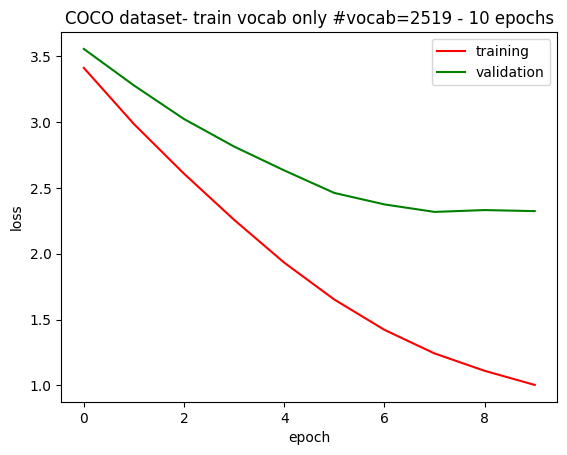

In [33]:
fig = plt.figure()

plt.plot(stats[:,0], 'r', label = 'training', )
plt.plot(stats[:,1], 'g', label = 'validation' )
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title(f"COCO dataset- train vocab only #vocab={len(vocab)} - 10 epochs")
fig.savefig("coco_train_vocab_only.png")
plt.show()

Based on the results of running thirty generations, it appears that overfitting occurs starting in the tenth generation going forward, and the validation set loss begins to grow. Therefore it is reasonable to stop at generation 10.

In [34]:
# save model after training
decoder_ckpt = torch.save(decoder, "coco_subset_assessment_decoder.ckpt")

### 6 Test prediction and evaluation [10 marks] 

#### 6.1 Generate predictions on test data (4 marks)

Display 4 sample test images containing different objects, along with your model’s generated captions and all the reference captions for each.

> Remember that everything **displayed** in the submitted notebook and .html file will be marked, so be sure to run all relevant cells.

In [35]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import os

class COCOImagesDataset(Dataset):
    def __init__(self, df, transform=None):
        self.dataframe = df['file_name'].unique()
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        filename = self.dataframe[idx]
        image = Image.open(os.path.join("coco","images",filename)).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image, filename

In [36]:
data_transform = transforms.Compose([ 
    transforms.Resize(224),     
    transforms.CenterCrop(224), 
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406),   # using ImageNet norms
                         (0.229, 0.224, 0.225))])

dataset_test = COCOImagesDataset(
    df=test_set,
    transform=data_transform,
)
test_loader = torch.utils.data.DataLoader(
    dataset_test,
    batch_size=32,
    shuffle=False,
    num_workers=0)

In [37]:
model = model.to(device)
model.eval()
decoder.eval() # generate caption, eval mode to not influence batchnormncoder.eval()

DecoderRNN(
  (resize): Linear(in_features=2048, out_features=256, bias=True)
  (bn): BatchNorm1d(256, eps=1e-05, momentum=0.01, affine=True, track_running_stats=True)
  (embed): Embedding(2519, 256)
  (rnn): RNN(256, 512, batch_first=True)
  (linear): Linear(in_features=512, out_features=2519, bias=True)
)

In [38]:
# getting functions from helperDL.py
from helperDL import timshow
from helperDL import decode_caption

GENERATED: a plate of food with string and veggies

REFERENCES:
closeup of bins of food that include broccoli and bread
a meal is presented in brightly colored plastic trays
there are containers filled with different kinds of foods
colorful dishes holding meat vegetables fruit and bread
a bunch of trays that have different food



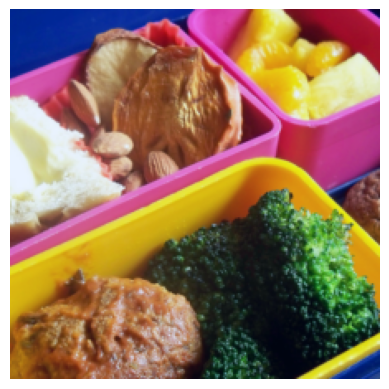

GENERATED: a man riding a red bike across a river

REFERENCES:
a group of people walking down a busy street on a rainy night under umbrellas
people walking and cars travelling in the rain
a street scene of cars and people during a rainy night
rain coming down in a city street with traffic and pedestrians
a rainy night on a crowded busy street in a big city



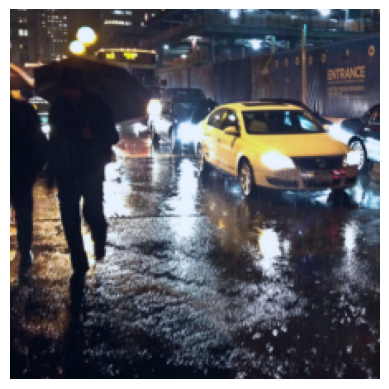

GENERATED: a man surfing on a surfboard at the beach

REFERENCES:
a man surfing on a wave in the ocean
a person riding a wave on top of a surfboard
a man surfing in the water on a large wave
person surfing a large wave in the ocean
a man in a wet suit riding on a surfboard



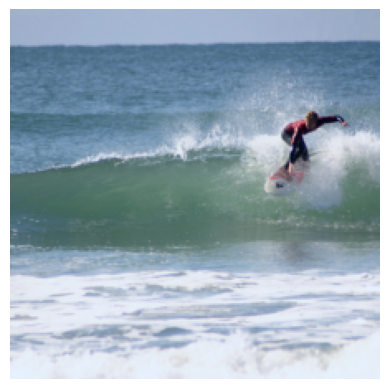

GENERATED: a wooden table topped with a tray of food

REFERENCES:
two hot dogs laying on a plate with a glass of wine to the side
a pink plate topped with two sausages on a bun
this meal has two sausages with buns on a plate
the sausage is sitting on the side of the plate
there are two hot dogs on the plate one half eaten



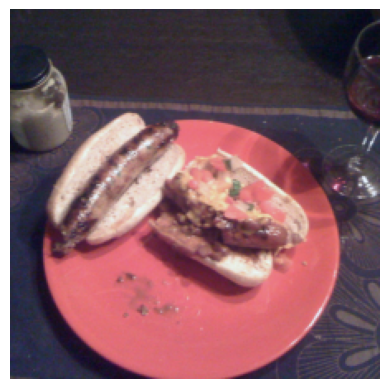

In [39]:
IMAGES_TO_SHOW = 4
idx = 0
with torch.no_grad():
    for i, (image,filename) in enumerate(test_loader):
        
        # your code here --->
        image = image.to(device)
        features = model(image)
        pre_ids = decoder.sample(features).cpu().numpy()
        pre_cap = decode_caption(pre_ids[0],vocab)


        
        print(f"GENERATED: {pre_cap}\n")
        print("REFERENCES:")
        for i in test_set[test_set['file_name'] == filename[0]]['clean_caption']:
            print(i)
        print("===================================\n")


        timshow(image[0].cpu())
        idx +=1
        if idx == IMAGES_TO_SHOW:
            break

#### 6.2 Caption evaluation using cosine similarity (6 marks)

The cosine similarity measures the cosine of the angle between two vectors in n-dimensional space. The smaller the angle, the greater the similarity.

To use the cosine similarity to measure the similarity between the generated caption and the reference captions: 

* Find the embedding vector of each word in the caption 
* Compute the average vector for each caption 
* Compute the cosine similarity score between the average vector of the generated caption and average vector of each reference caption
* Compute the average of these scores 

Calculate the cosine similarity using the model's predictions over the whole test set. 

Display a histogram of the distribution of scores over the test set.

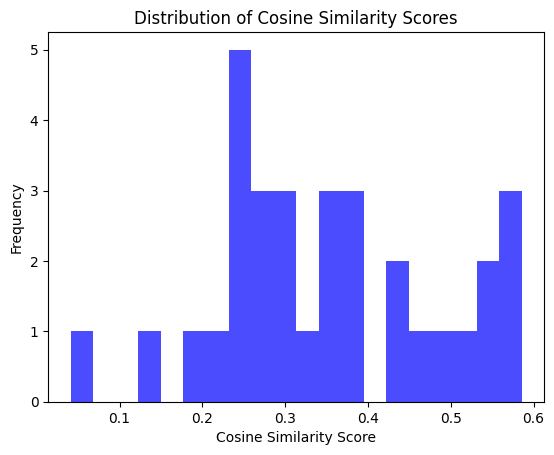

In [40]:
# your code here
from torch.nn.functional import cosine_similarity
import numpy as np
import matplotlib.pyplot as plt


def average_caption_embedding(caption, embeddings_model):
    embeds = [vocab(embed) for embed in caption.split()]
    embeds_tensor = torch.tensor(embeds).unsqueeze(0).to(device)
    with torch.no_grad():
        embeds = embeddings_model(embeds_tensor)
    average_embeds = embeds.mean(dim = 1)
    return average_embeds

def score_cal(test_set, embeddings_model,cap_avg):
    # Compute cosine similarity between two vectors
    scores = []
    for i in test_set[test_set['file_name'] == filename[0]]['clean_caption']:
        i_avg = average_caption_embedding(i,embeddings_model)
        score = cosine_similarity(cap_avg,i_avg)
        scores.append(score.item())
    return scores

embeddings_model = decoder.embed

cosine_scores = []
for i, (image ,filename) in enumerate(test_loader):
    image = image.to(device)
    features = model(image)
    pre_ids = decoder.sample(features).cpu().numpy()
    pre_cap = decode_caption(pre_ids[0],vocab)
    
    gen_cap_avg_vec = average_caption_embedding(pre_cap, embeddings_model)
    
    ref_scores = score_cal(test_set, embeddings_model,gen_cap_avg_vec)
    
    cosine_scores.append(np.mean(ref_scores))

# Display a histogram of cosine similarity scores
plt.hist(cosine_scores, bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Cosine Similarity Scores')
plt.xlabel('Cosine Similarity Score')
plt.ylabel('Frequency')
plt.show()


##### Thank you for completing the assessment - if you have any question, please ask on teams channel or attend lab sessions on Tuesdays and Wednesdays.